In [3]:
# Load libraries

library(rgdal)
library(spsurvey)
library(sf)
library(ggplot2)
install.packages("foreign")
library(foreign)

#set.seed(51)

Loading required package: sf

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


spsurvey version 5.0.0 introduced significant changes to the inputs and outputs of many functions. Please review the updated materials, vignettes, and documentation by visiting 
 https://cran.r-project.org/package=spsurvey

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# read the shape file
ellw <- st_read("../data/Elliot_Catchment.shp", quiet = TRUE)
# read the dbf file 
att<-read.dbf("../data/Elliot_Catchment.dbf",as.is = F)

In [5]:
head(ellw)
head(att)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,OBJECTID,WB_ID,AREA_M2,SHAPE_Leng,SHAPE_Area,WB_NAME,AREA_KM2,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<POLYGON [m]>
1,736,5950,37100606,39437.07,37100606,Elliot Water/Rottenraw Burn,37.10061,"POLYGON ((356225 745675, 35..."


,OBJECTID,WB_ID,AREA_M2,SHAPE_Leng,SHAPE_Area,WB_NAME,AREA_KM2
,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,736,5950,37100606,39437.07,37100606,Elliot Water/Rottenraw Burn,37.10061


In [6]:
typeof(ellw)
typeof(att)

[1] "list"

[1] "list"

In [7]:
#?grts

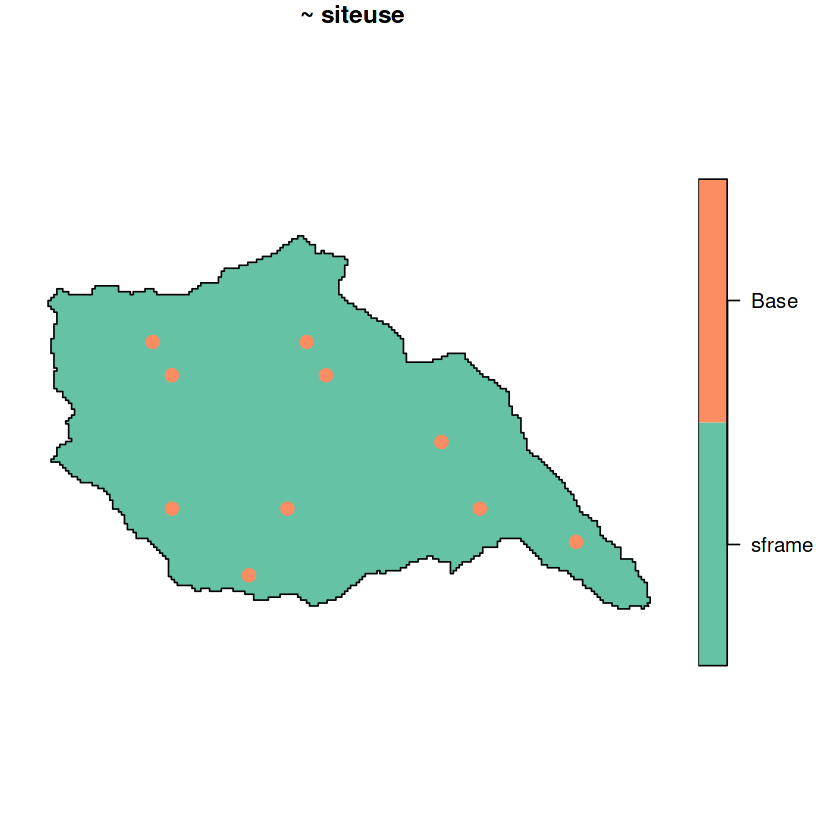

In [8]:
eqprob <- grts(ellw, n_base = 10)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

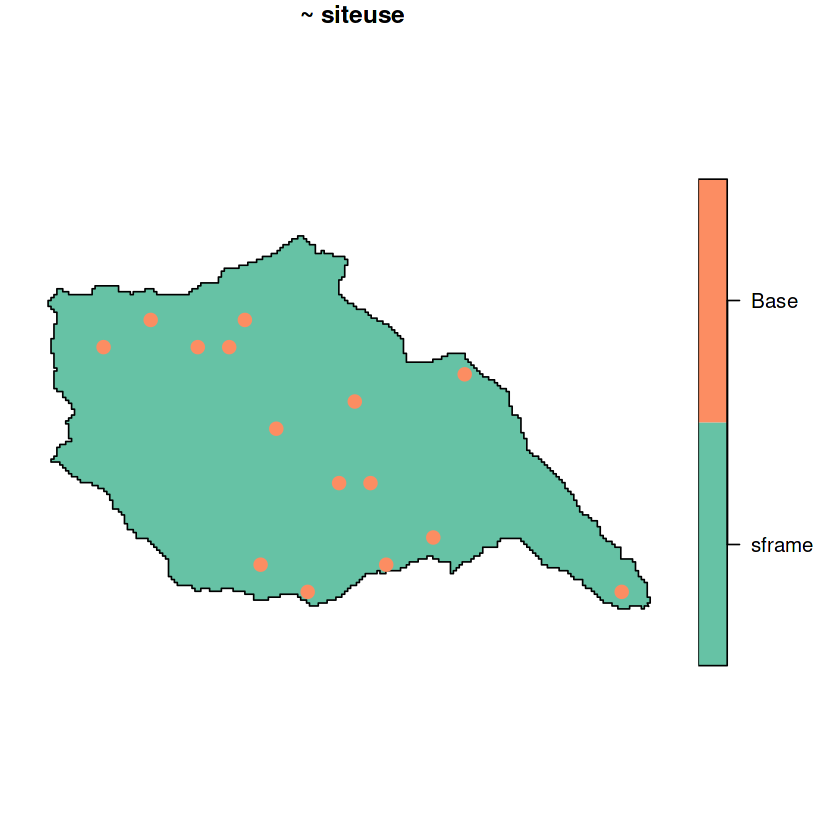

In [9]:
eqprob <- grts(ellw, n_base = 15)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

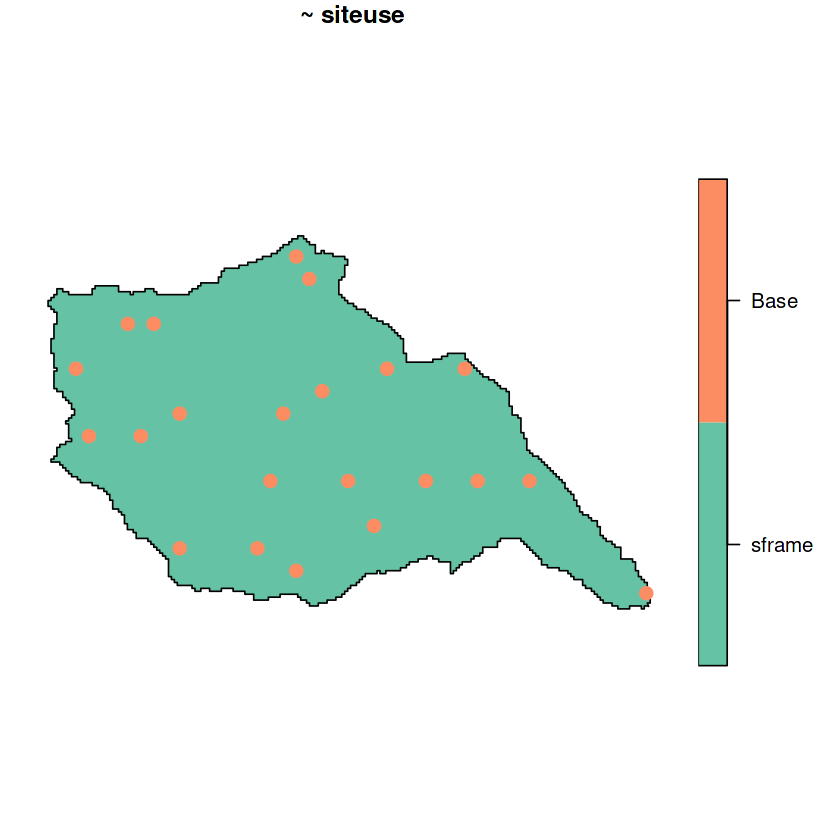

In [10]:
eqprob <- grts(ellw, n_base = 22)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)
text(x=0, y=5, 'B', xpd=NA)


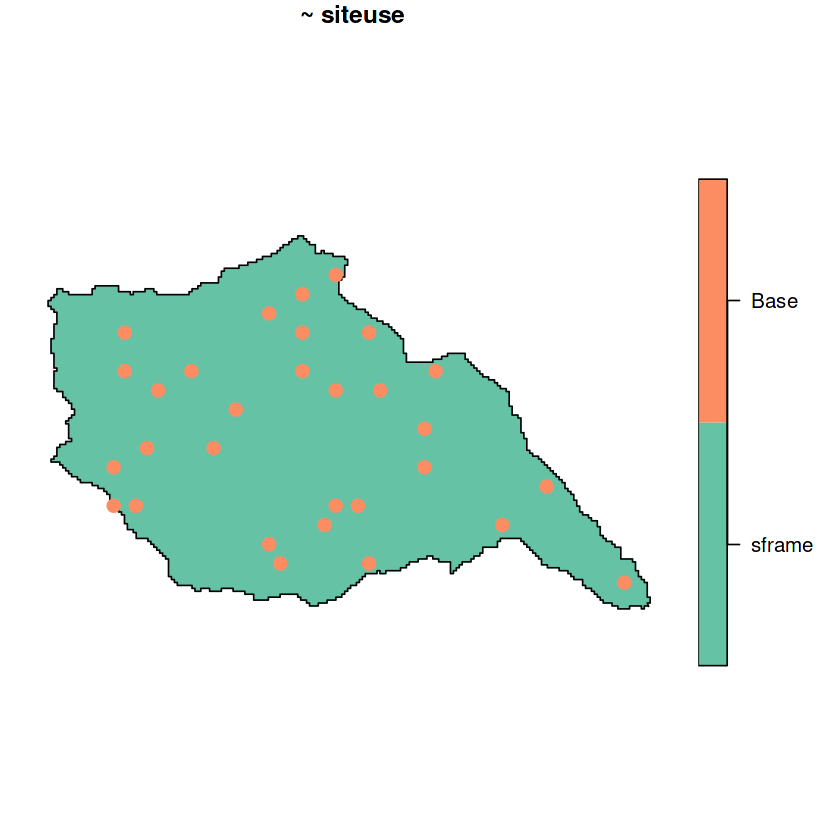

In [12]:
eqprob <- grts(ellw, n_base = 30)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

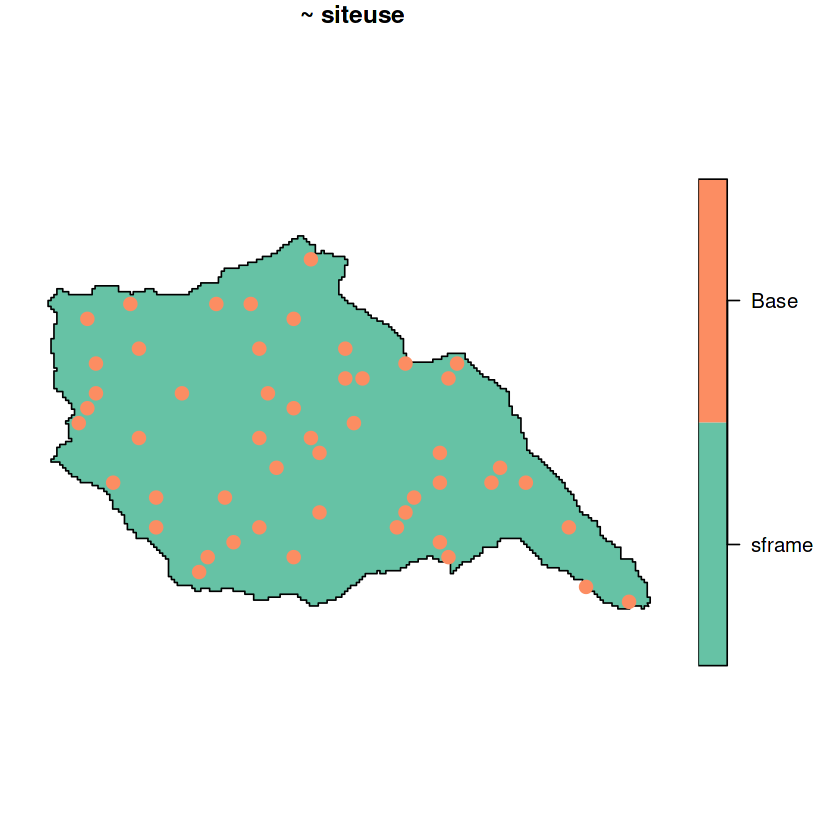

In [13]:
eqprob <- grts(ellw, n_base = 50)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

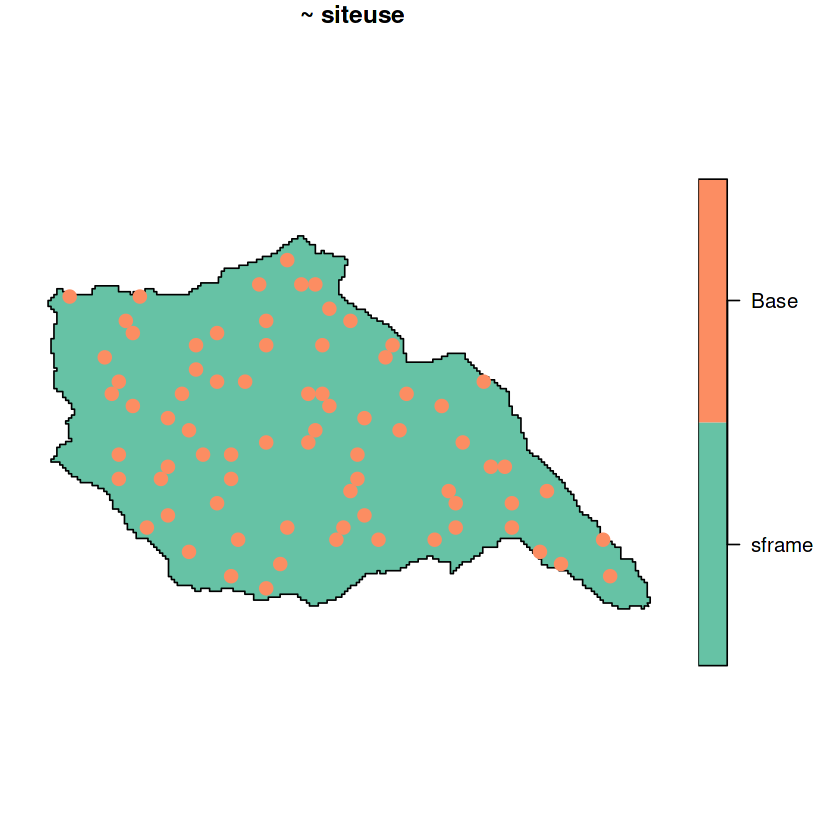

In [14]:
eqprob <- grts(ellw, n_base = 75)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

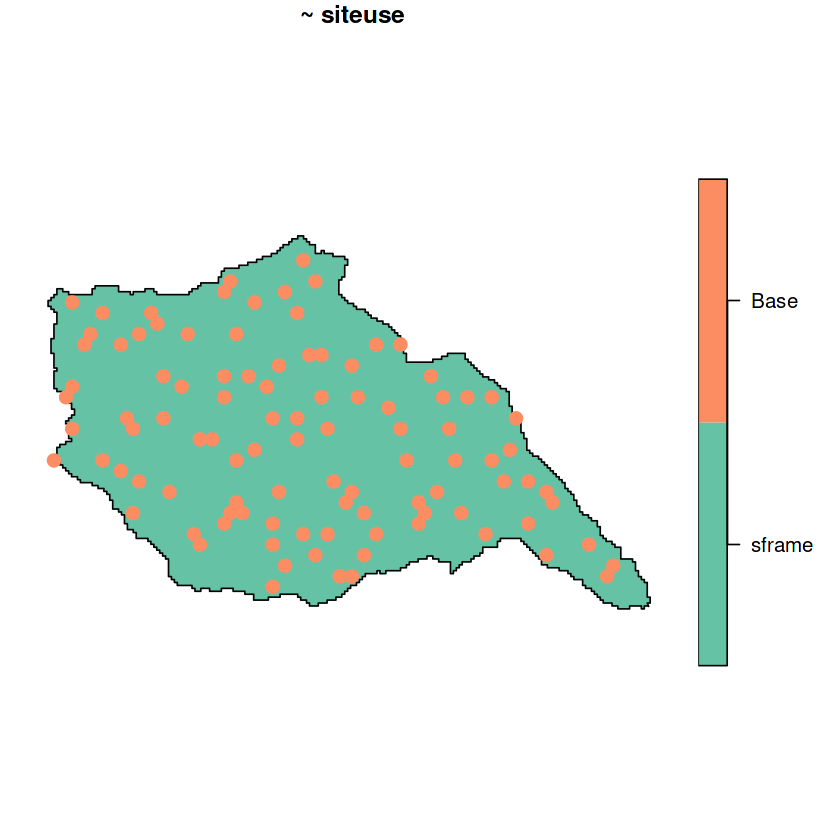

In [15]:
eqprob <- grts(ellw, n_base = 100)
plot(eqprob,ellw,key.width = lcm(3),cex = 1.5,pch=16)

In [16]:
# let's go for BAS

#R.Version()

In [17]:
getRversion()


[1] ‘4.0.5’

In [18]:
library(devtools)


Loading required package: usethis



In [19]:
install_github("tmcd82070/SDraw")

Rcpp         (1.0.10 -> 1.0.11 ) [CRAN]
pkgload      (1.3.2  -> 1.3.2.1) [CRAN]
digest       (0.6.32 -> 0.6.33 ) [CRAN]
testthat     (3.1.9  -> 3.1.10 ) [CRAN]
rJava        (NA     -> 1.0-6  ) [CRAN]
sf           (1.0-13 -> 1.0-14 ) [CRAN]
OpenStree... (NA     -> 0.3.4  ) [CRAN]


Installing 7 packages: Rcpp, pkgload, digest, testthat, rJava, sf, OpenStreetMap

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘Rcpp’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzqVwfT/remotes24ea1753d/tmcd82070-SDraw-da50989/DESCRIPTION’ ... OK
* preparing ‘SDraw’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘SDraw_2.1.13.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(SDraw)

rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


SDraw - Sample Draws (v 2.1.13)



In [21]:
#online example
data("WA")
n <- 25
J <- c(3,2)
S <- sdraw(WA, n, "HIP", J = J)
#S

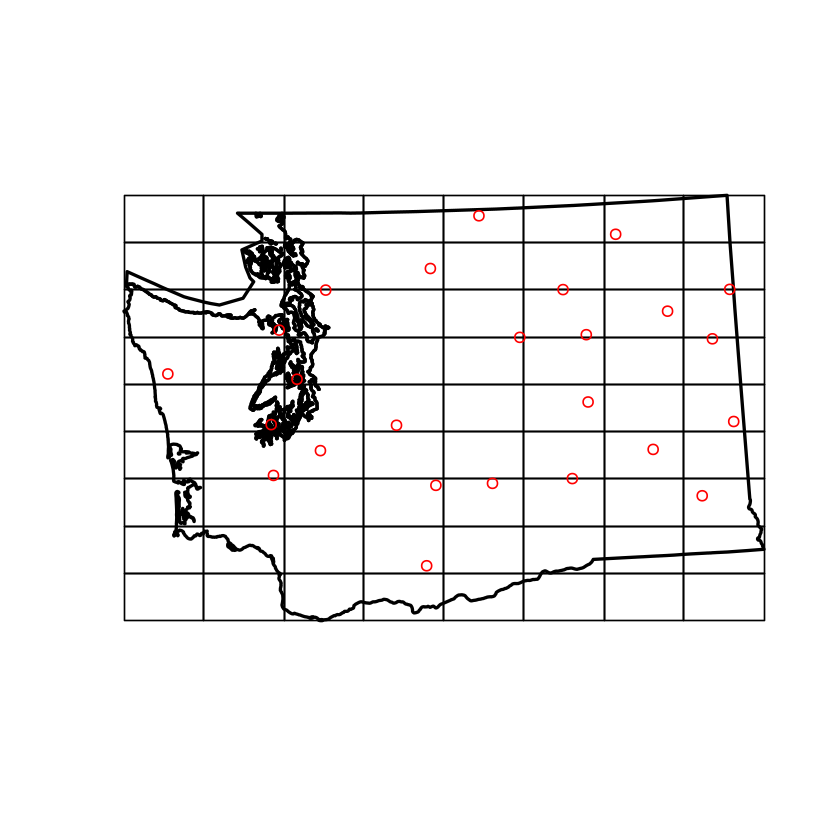

In [22]:
hip.plot.lattice(WA, J = J, sample = S)


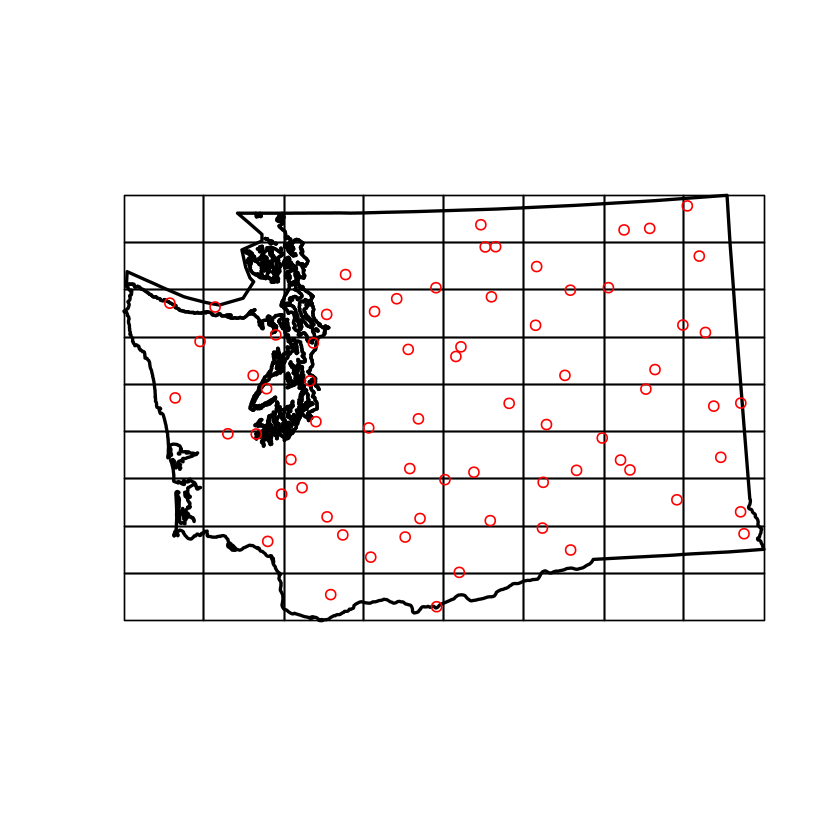

In [23]:
n <- 70
J <- c(3,2)
S <- sdraw(WA, n, "HIP", J = J)
hip.plot.lattice(WA, J = J, sample = S)

In [24]:
typeof(WA)
typeof(ellw)

[1] "S4"

[1] "list"

In [25]:
ellw

OBJECTID,WB_ID,AREA_M2,SHAPE_Leng,SHAPE_Area,WB_NAME,AREA_KM2,geometry
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<POLYGON [m]>
736,5950,37100606,39437.07,37100606,Elliot Water/Rottenraw Burn,37.10061,"POLYGON ((356225 745675, 35..."


In [26]:
#Convert a spatial frame to a SpatialPolygonsDataFrame or a list to a S4 object
ellw_s4 <- as_Spatial(ellw)

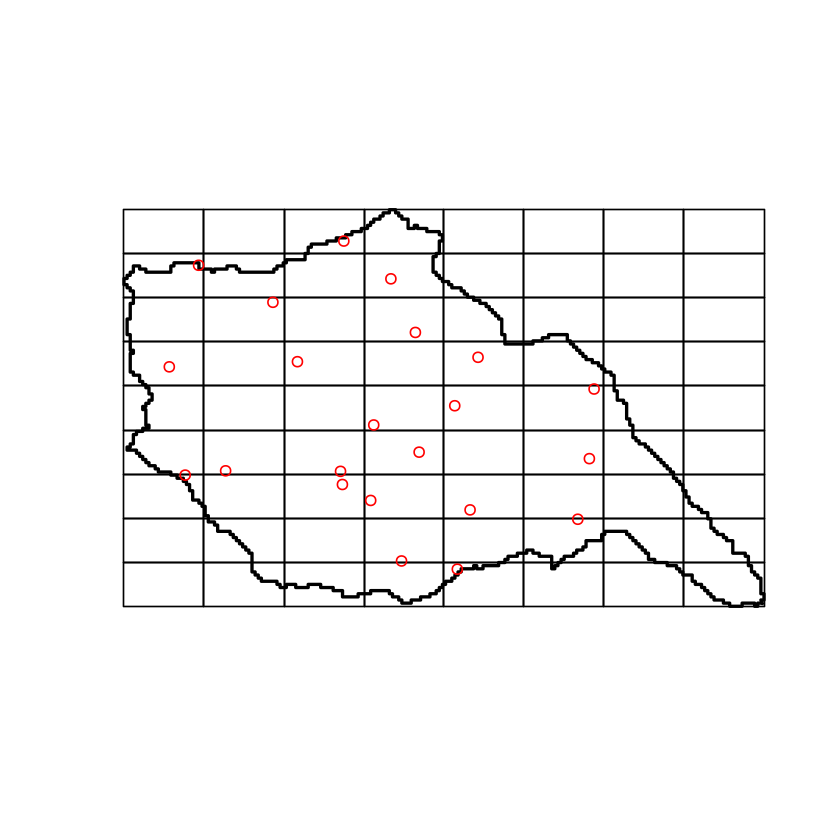

In [27]:
n <- 22
J <- c(3,2)
S <- sdraw(ellw_s4, n, "HIP", J = J)
hip.plot.lattice(ellw_s4, J = J, sample = S)

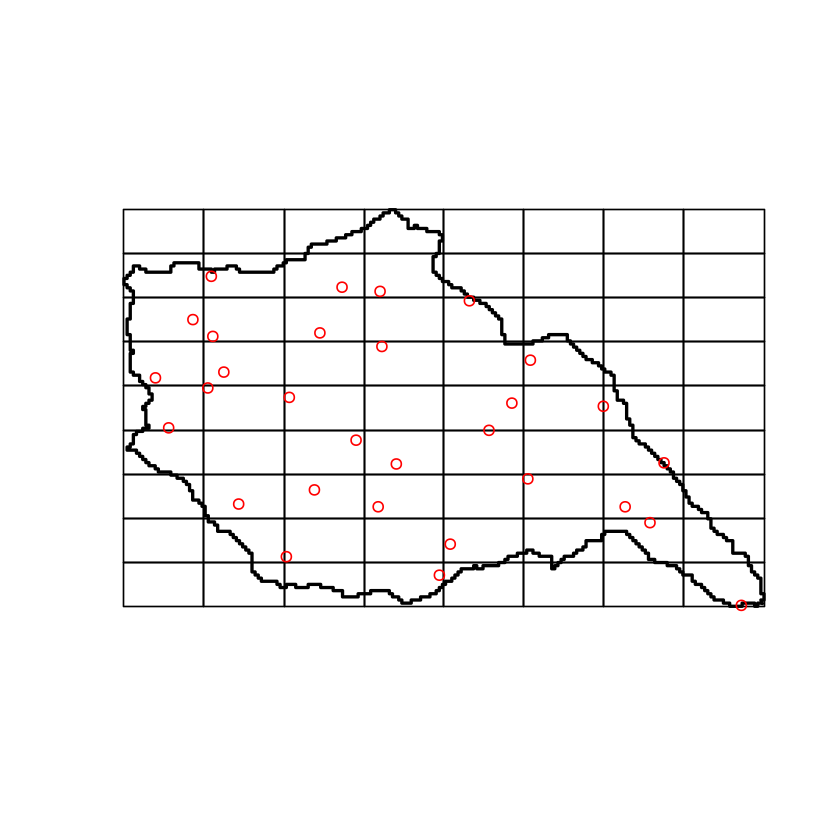

In [28]:
n <- 30
J <- c(3,2)
S <- sdraw(ellw_s4, n, "HIP", J = J)
hip.plot.lattice(ellw_s4, J = J, sample = S)

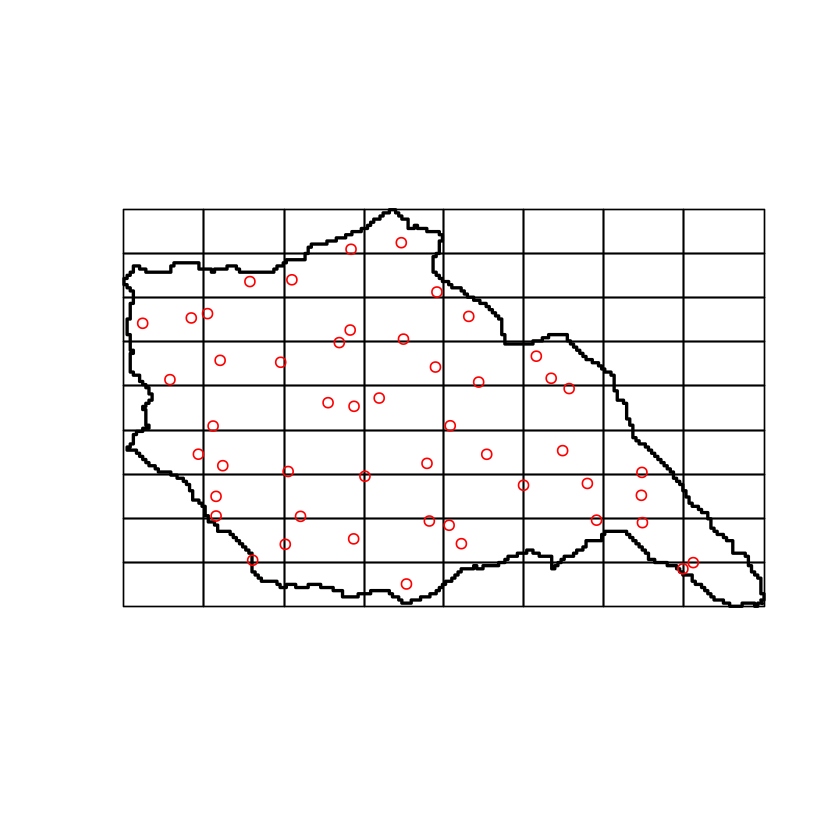

In [29]:
n <- 50
J <- c(3,2)
S <- sdraw(ellw_s4, n, "HIP", J = J)
hip.plot.lattice(ellw_s4, J = J, sample = S)

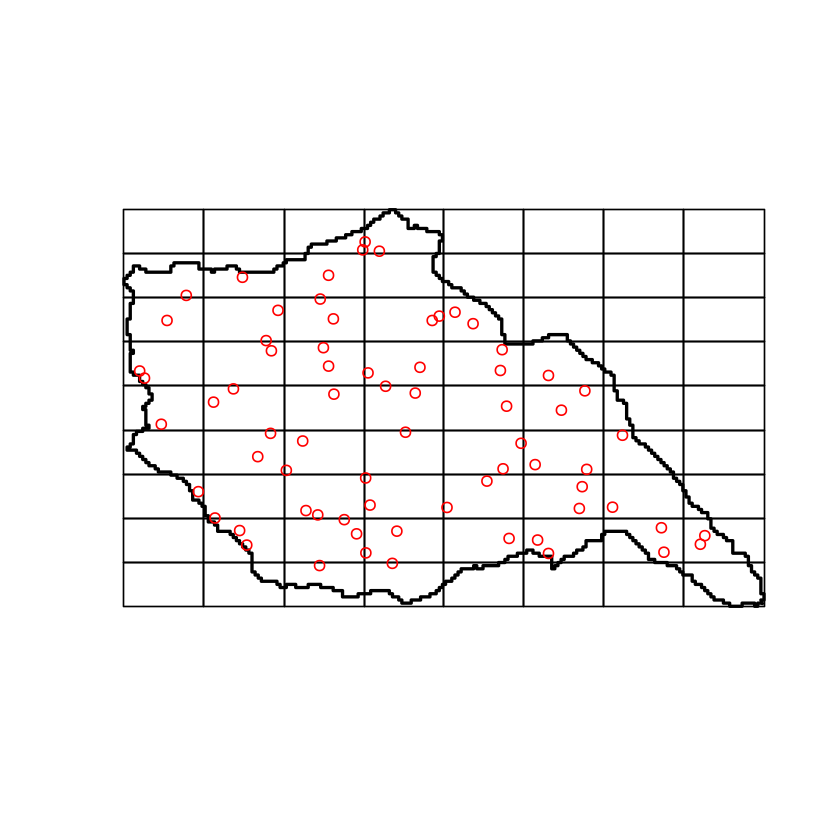

In [30]:
n <- 70
J <- c(3,2)
S <- sdraw(ellw_s4, n, "HIP", J = J)
hip.plot.lattice(ellw_s4, J = J, sample = S)

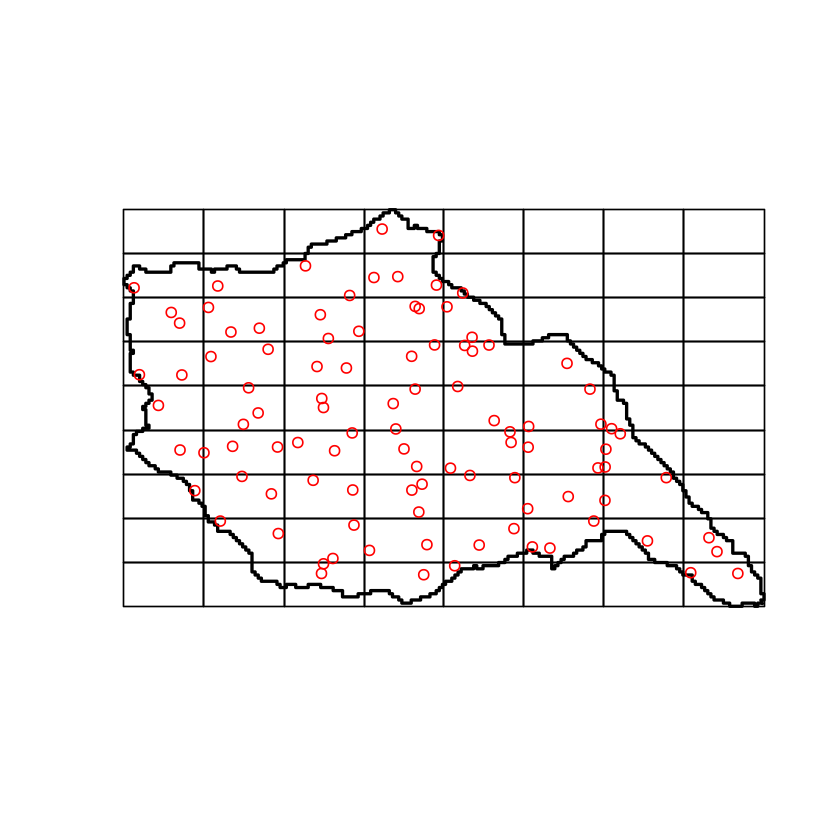

In [31]:
n <- 100
J <- c(3,2)
S <- sdraw(ellw_s4, n, "HIP", J = J)
hip.plot.lattice(ellw_s4, J = J, sample = S)

In [32]:
#BAS

n <- 22
J <- c(3,2)
S <- sdraw(ellw_s4, n, "BAS", J = J)


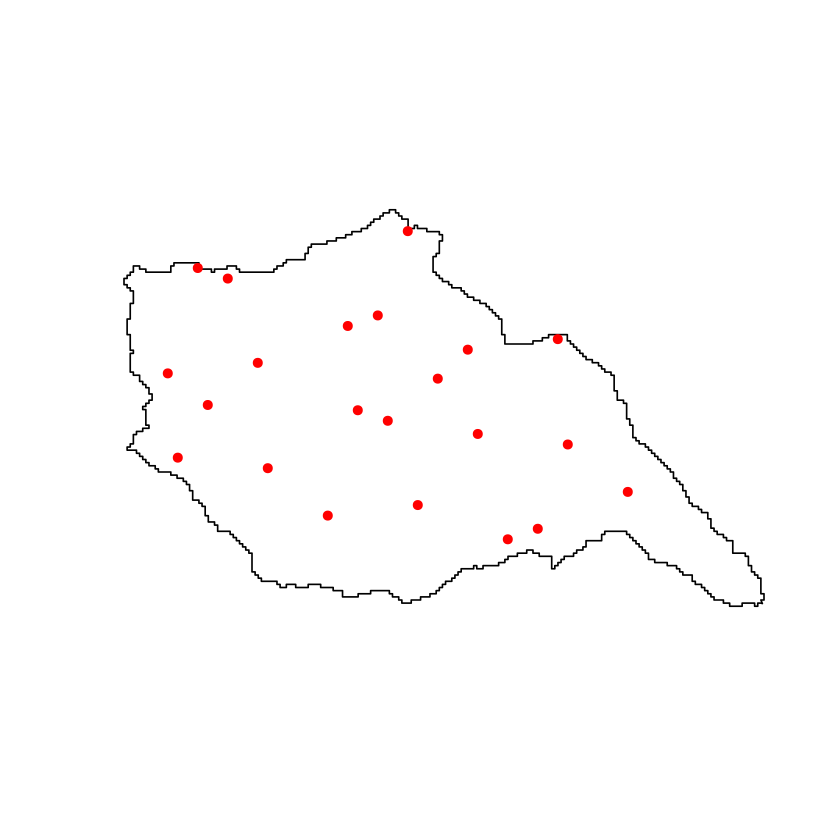

In [33]:
plot(ellw_s4)
points(S,pch=16,col='red')

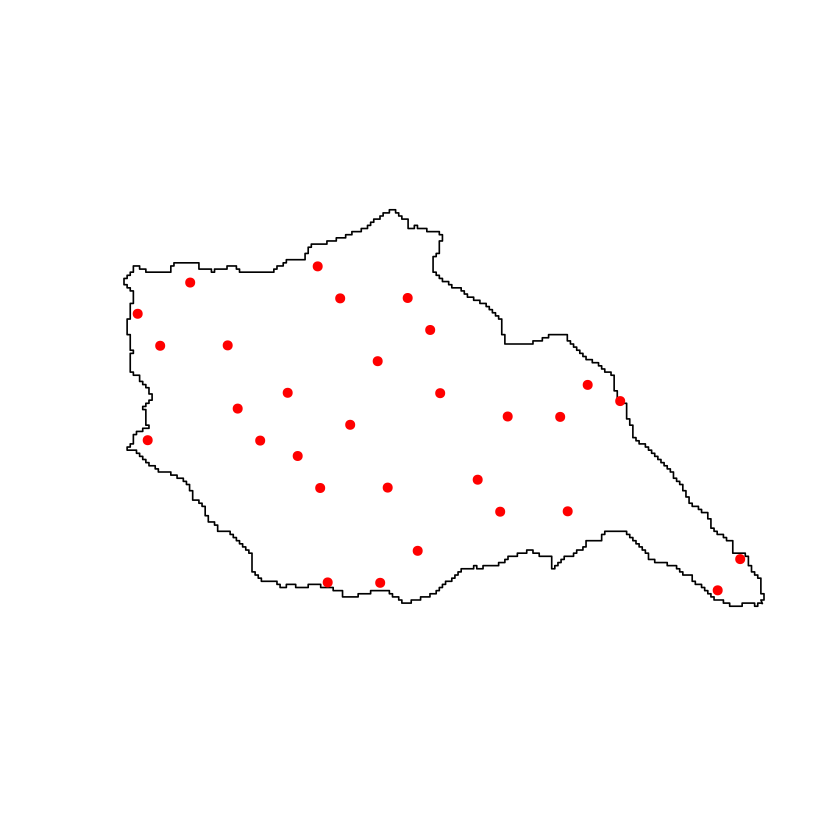

In [34]:
#BAS

n <- 30
J <- c(3,2)
S <- sdraw(ellw_s4, n, "BAS", J = J)
plot(ellw_s4)
points(S,pch=16,col='red')

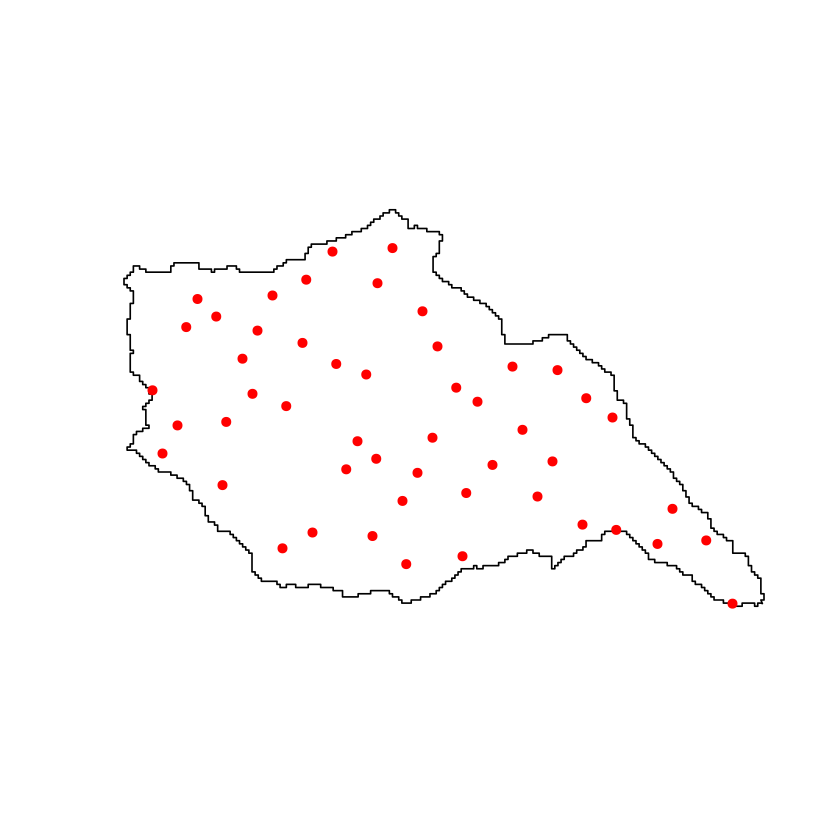

In [35]:
#BAS

n <- 50
J <- c(3,2)
S <- sdraw(ellw_s4, n, "BAS", J = J)
plot(ellw_s4)
points(S,pch=16,col='red')

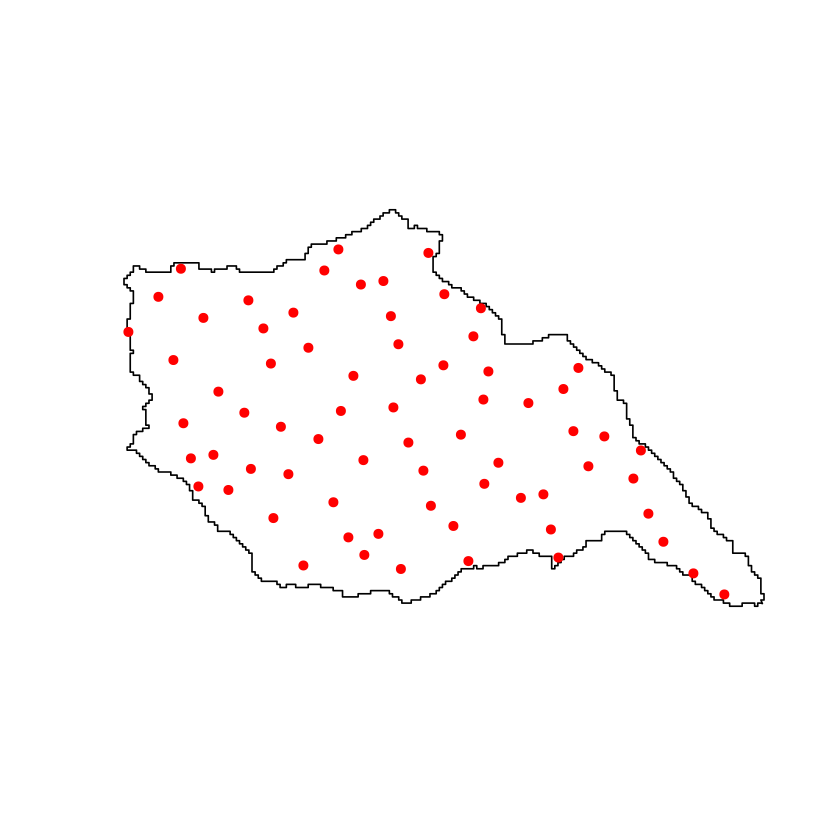

In [36]:
#BAS

n <- 70
J <- c(3,2)
S <- sdraw(ellw_s4, n, "BAS", J = J)
plot(ellw_s4)
points(S,pch=16,col='red')

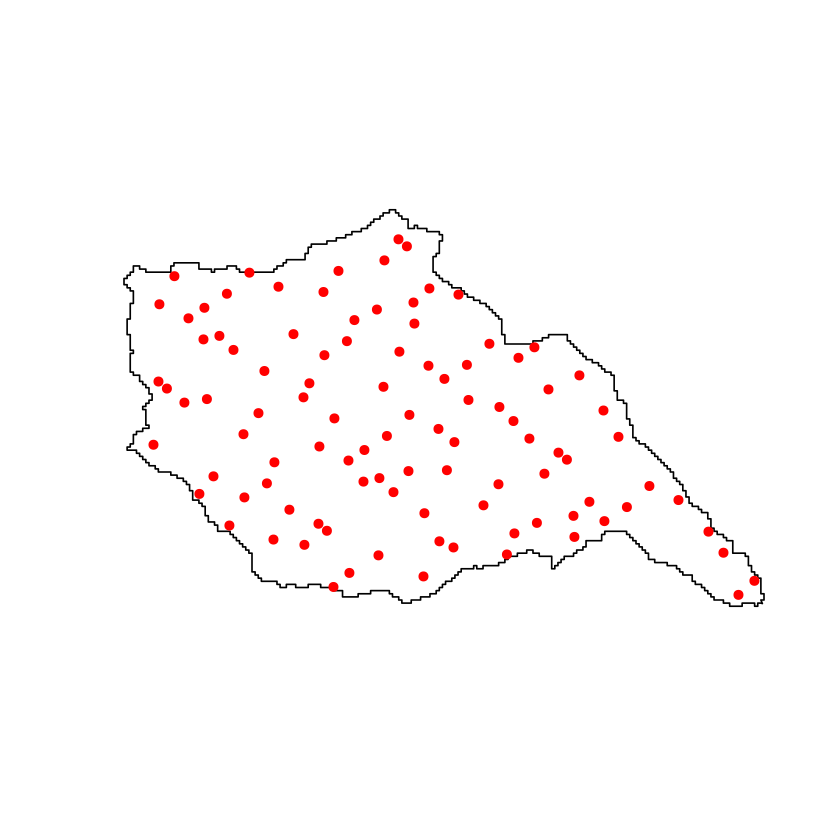

In [37]:
#BAS

n <- 100
J <- c(3,2)
S <- sdraw(ellw_s4, n, "BAS", J = J)
plot(ellw_s4)
points(S,pch=16,col='red')

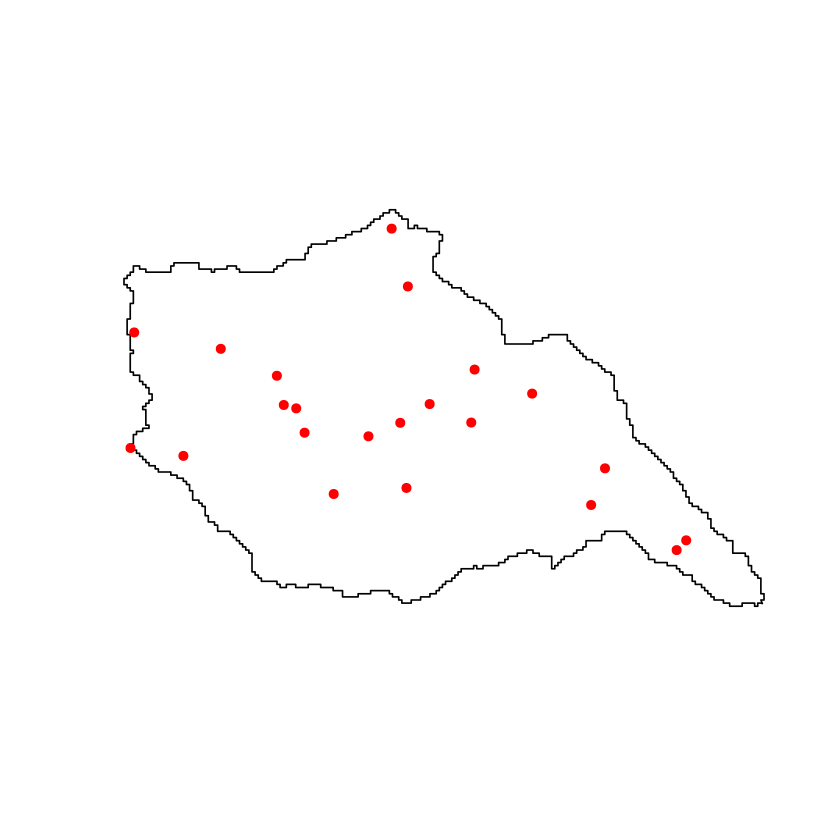

In [38]:
# SRS - simple random sampling
n=22
S <- sdraw(ellw_s4, n, "SRS")
plot(ellw_s4)
points(S,pch=16,col='red')

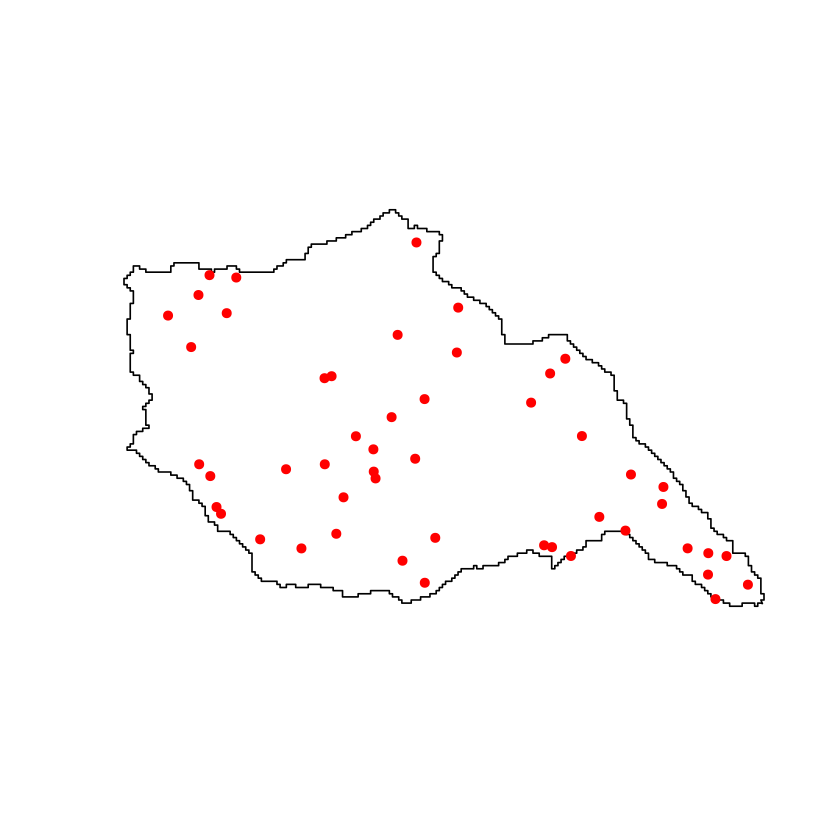

In [39]:
# SRS
n=50
S <- sdraw(ellw_s4, n, "SRS")
plot(ellw_s4)
points(S,pch=16,col='red')

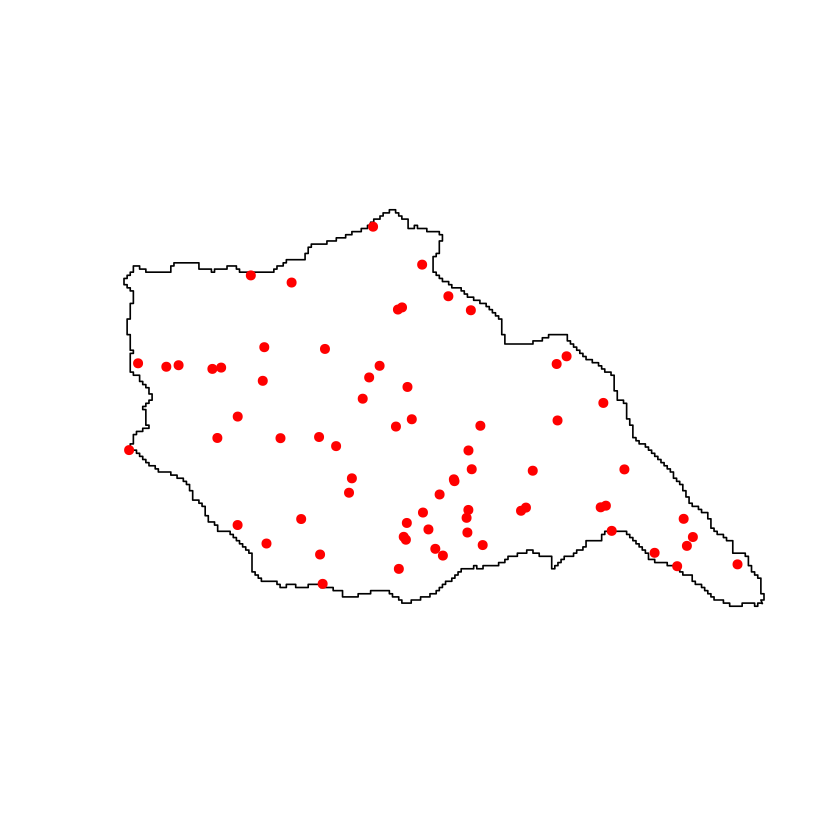

In [40]:
# SRS
n=70
S <- sdraw(ellw_s4, n, "SRS")
plot(ellw_s4)
points(S,pch=16,col='red')

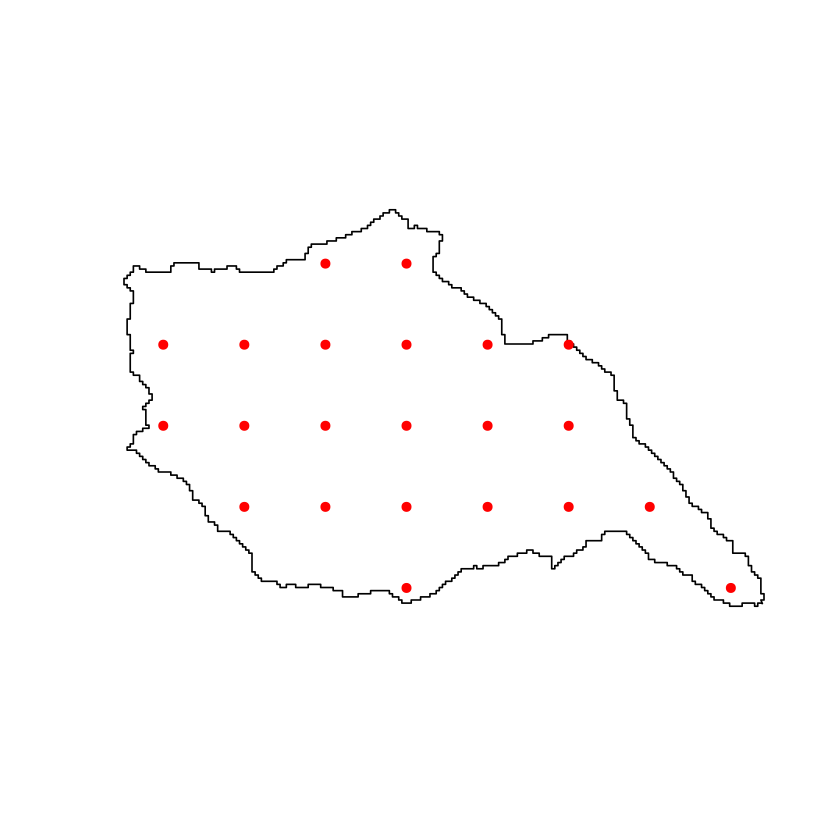

In [41]:
#systematic sampling

n=22
S <- sdraw(ellw_s4, n, "SSS")
plot(ellw_s4)
points(S,pch=16,col='red')


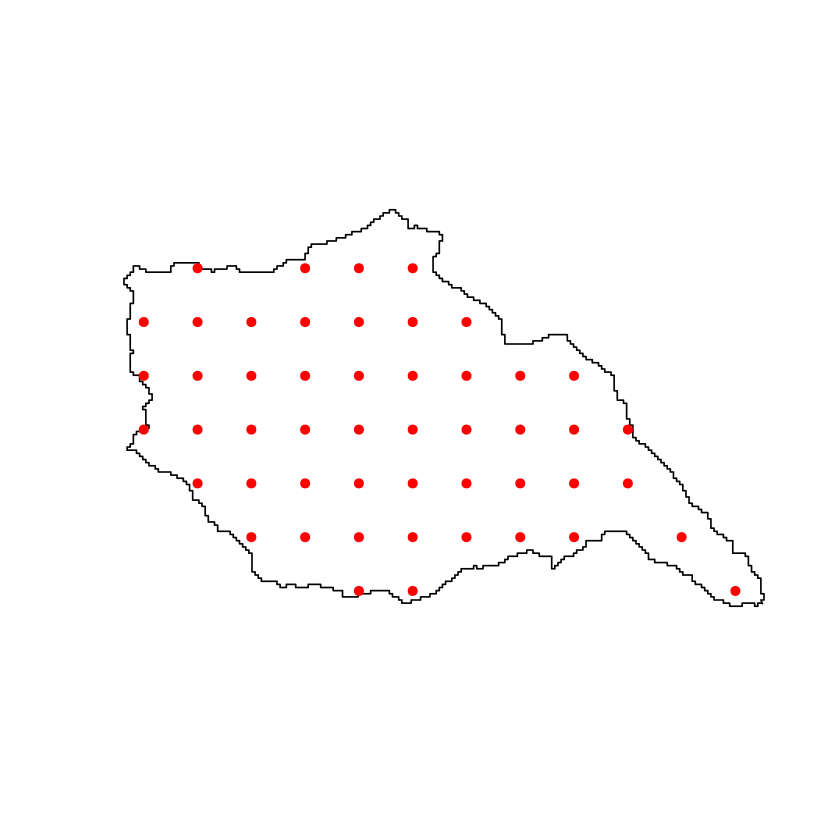

In [42]:
#systematic sampling

n=50
S <- sdraw(ellw_s4, n, "SSS")
plot(ellw_s4)
points(S,pch=16,col='red')


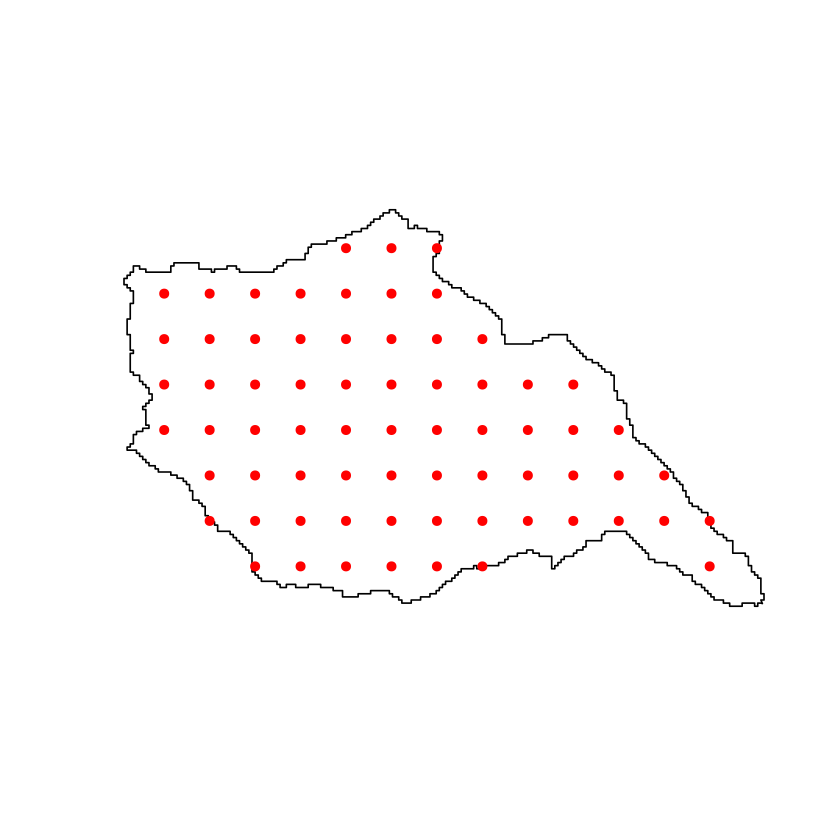

In [45]:
#systematic sampling

n=70
S <- sdraw(ellw_s4, n, "SSS")
plot(ellw_s4)
points(S,pch=16,col='red')



In [102]:
vignette("EDA", "spsurvey")

starting httpd help server ...
 done



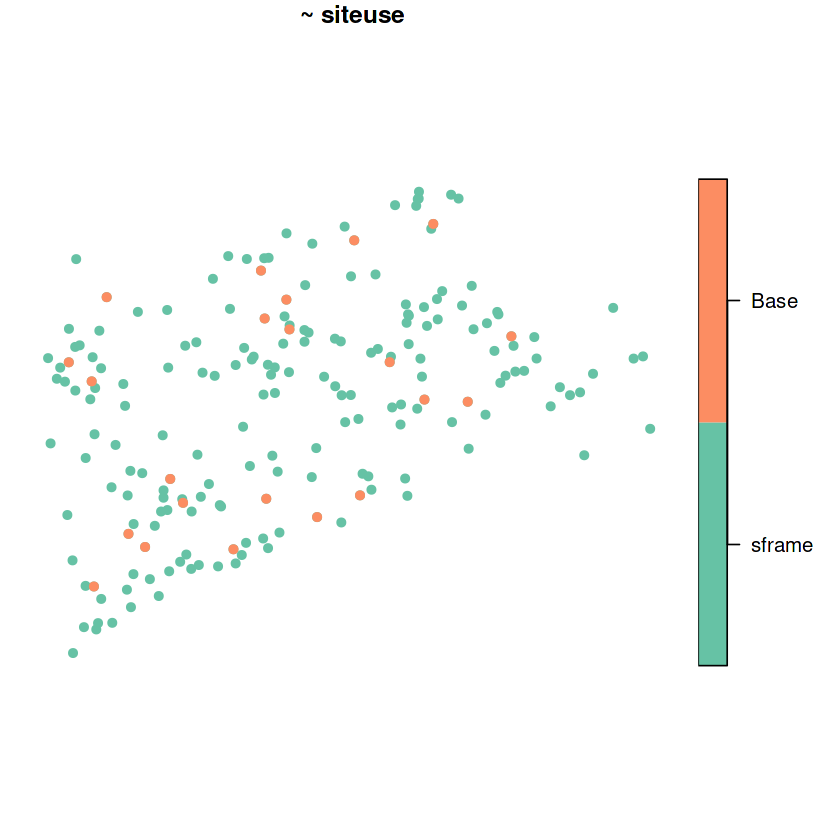

In [142]:
#GRTS for NE lakes 
eqprob <- grts(NE_Lakes, n_base = 22)
plot(eqprob, NE_Lakes, key.width = lcm(3),pch=16)
#plot(eqprob, NE_Lakes, key.width = lcm(3), key.pos = 4,cex=1.6)

In [166]:
#GRTS stratified equal probability based on elevation, #NE_Lakes
strata_n <- c(low = 45, high = 25)#the number of samples in each strata
strat_eqprob <- grts(NE_Lakes, n_base = strata_n, stratum_var = "ELEV_CAT")
strat_eqprob
# the summary should be explained into the text, and how you actually sample

Summary of Site Counts: 

siteuse by total: 
      Base
total   70

siteuse by stratum: 
     Base
high   25
low    45


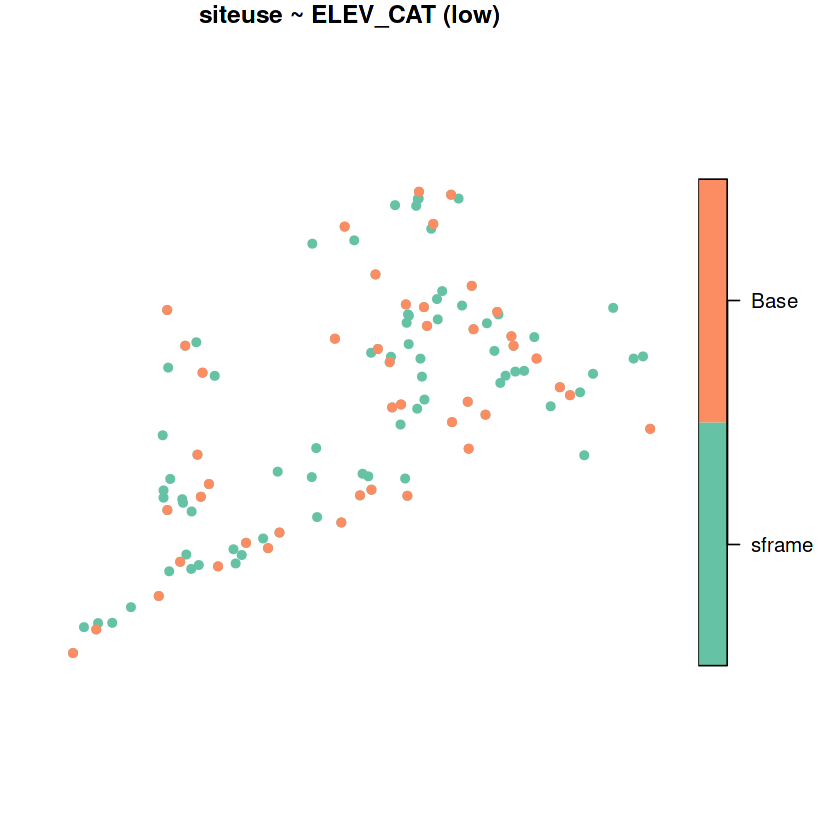

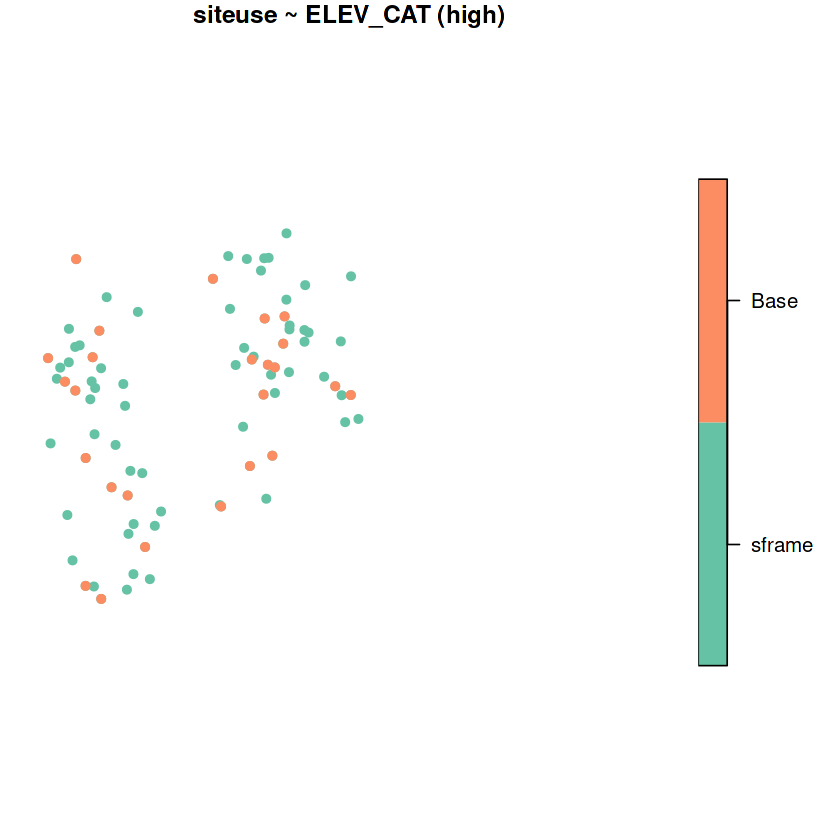

In [167]:
plot(strat_eqprob,formula = siteuse ~ ELEV_CAT, NE_Lakes,key.width = lcm(3),pch=16)

In [168]:
#Stratified unequal probability sampling
caty_n <- list(
  low = c(small = 35, large = 10),#35 samples in the low category, 20 small, 5 large
  high = c(small = 15, large = 10)# 25 samples in the high category, 15 small, 5 large
)
strat_uneqprob <- grts(
  NE_Lakes,
  n_base = strata_n,
  stratum_var = "ELEV_CAT",
  caty_var = "AREA_CAT",
  caty_n = caty_n
)
strat_uneqprob

Summary of Site Counts: 

siteuse by total: 
      Base
total   70

siteuse by stratum: 
     Base
high   25
low    45

siteuse by caty: 
      Base
large   22
small   48

siteuse by stratum:caty: 
           Base
high:large   11
low:large    11
high:small   14
low:small    34


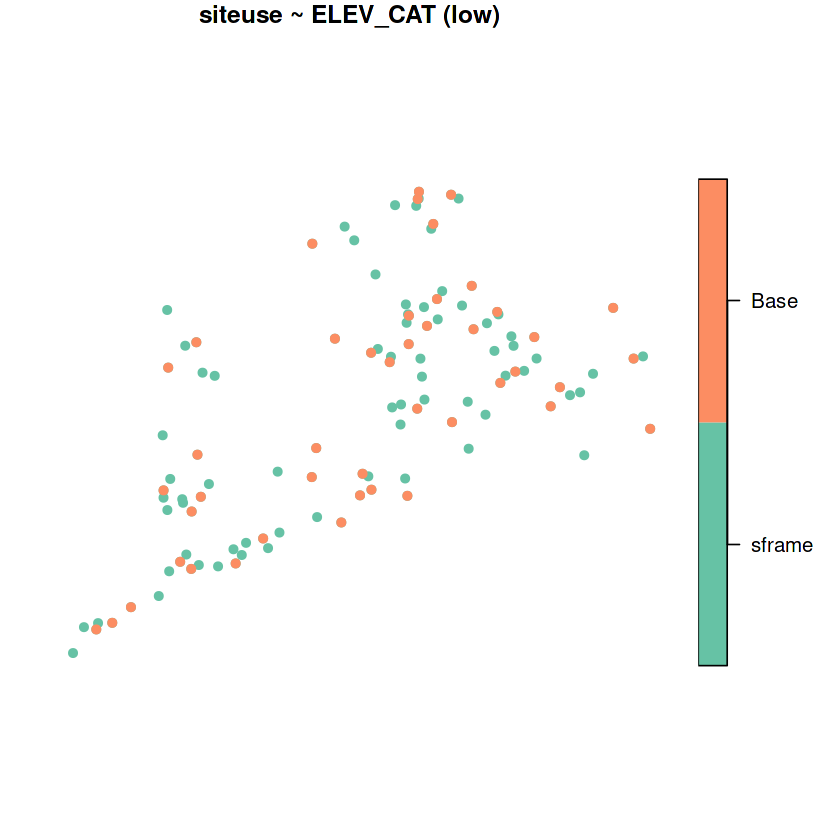

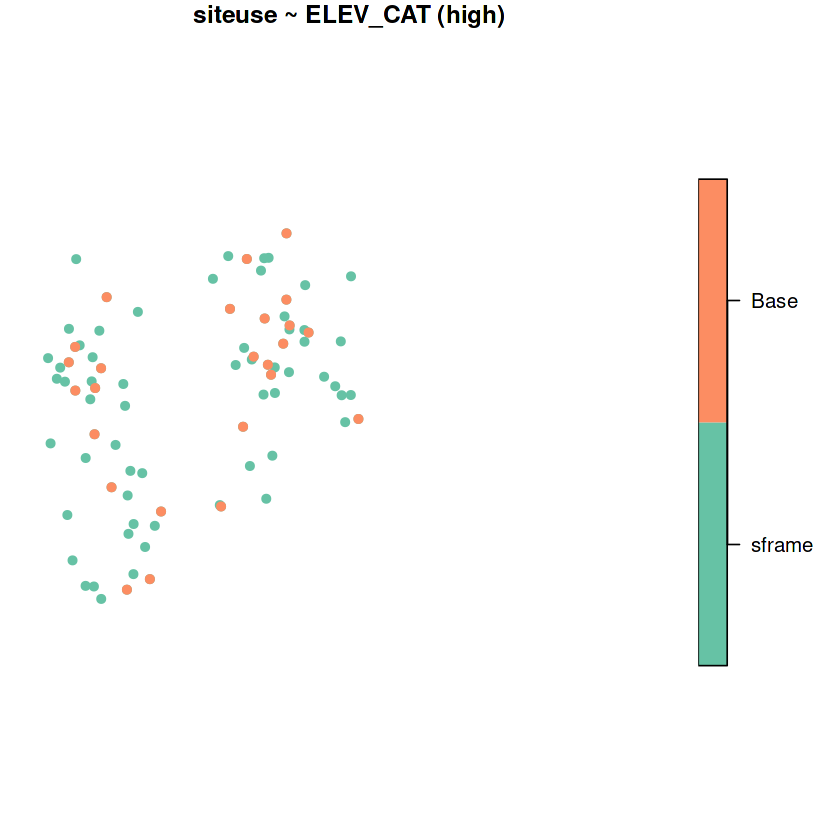

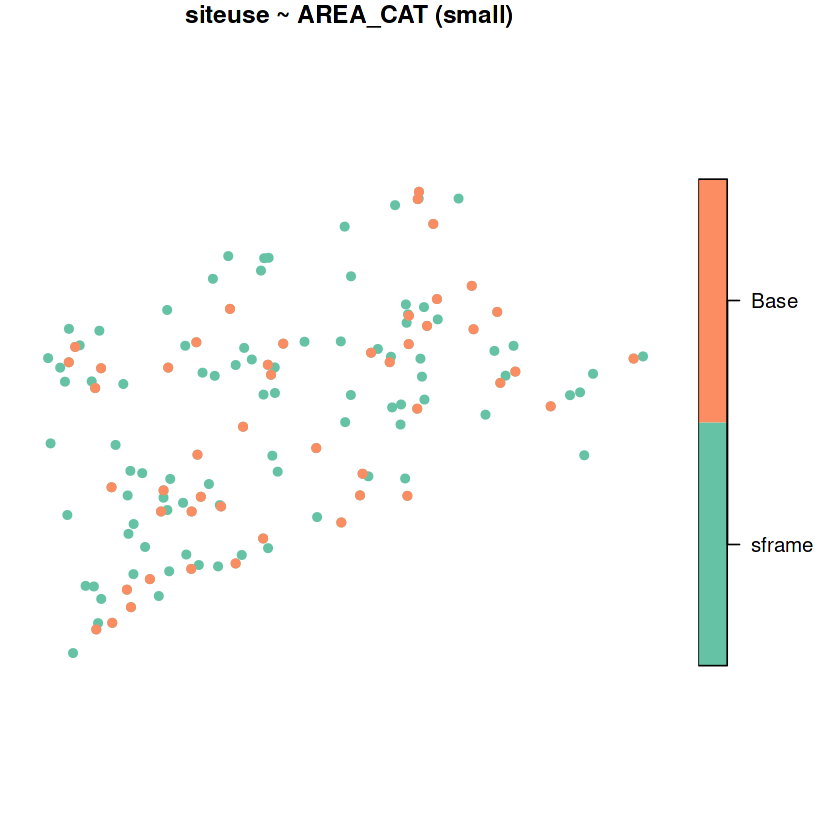

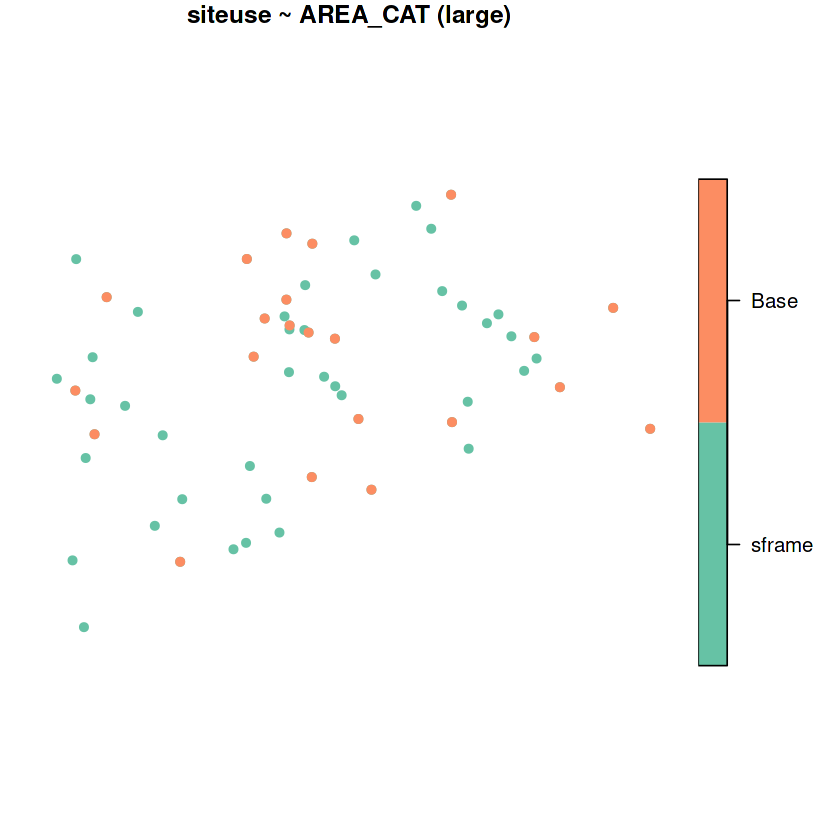

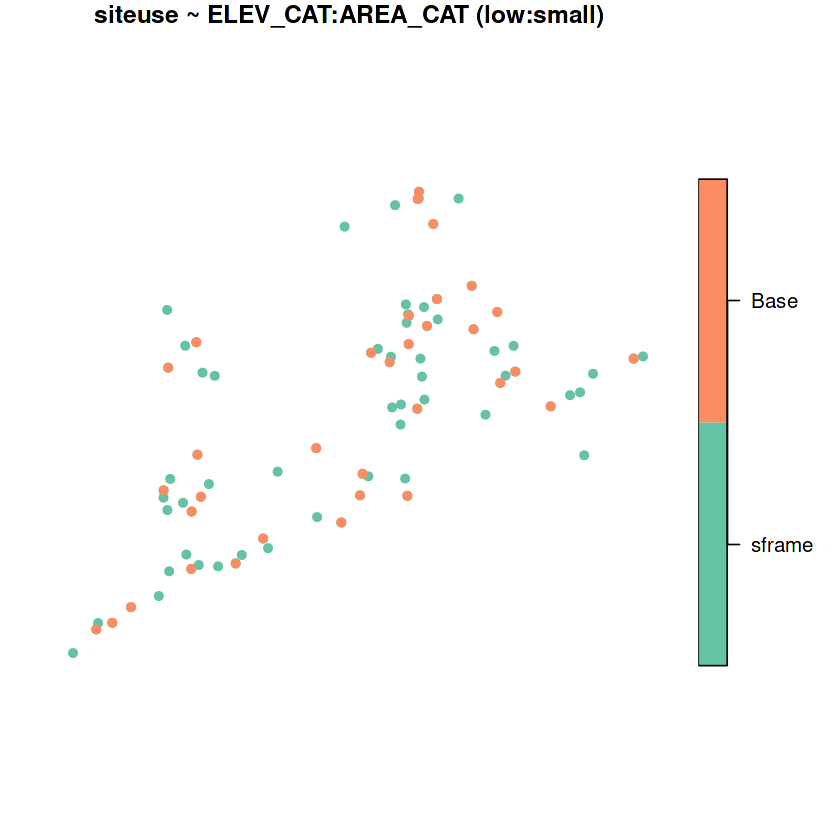

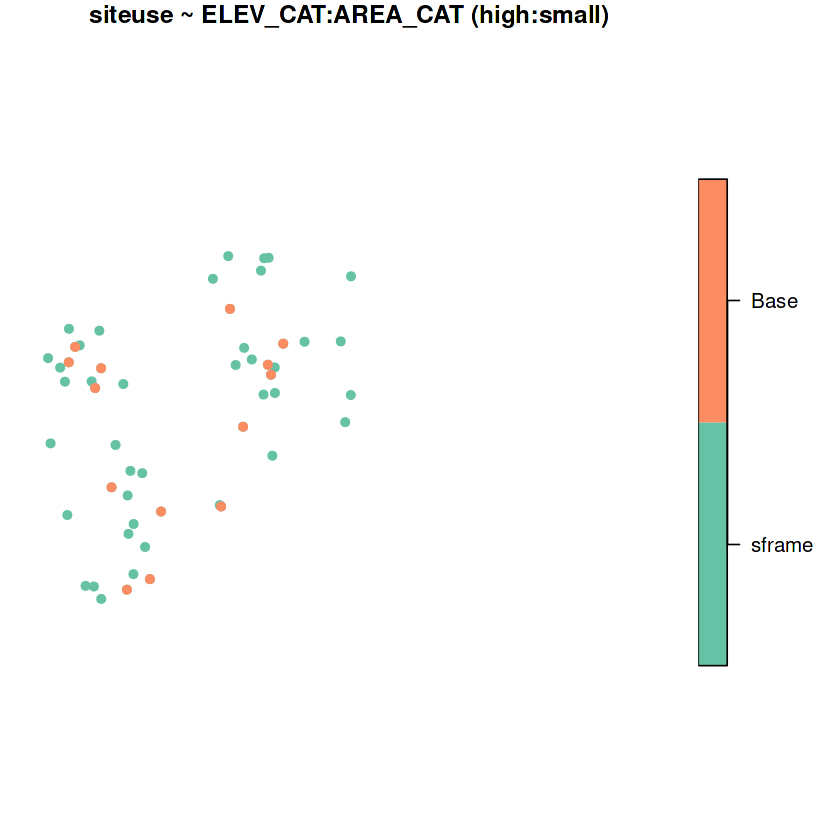

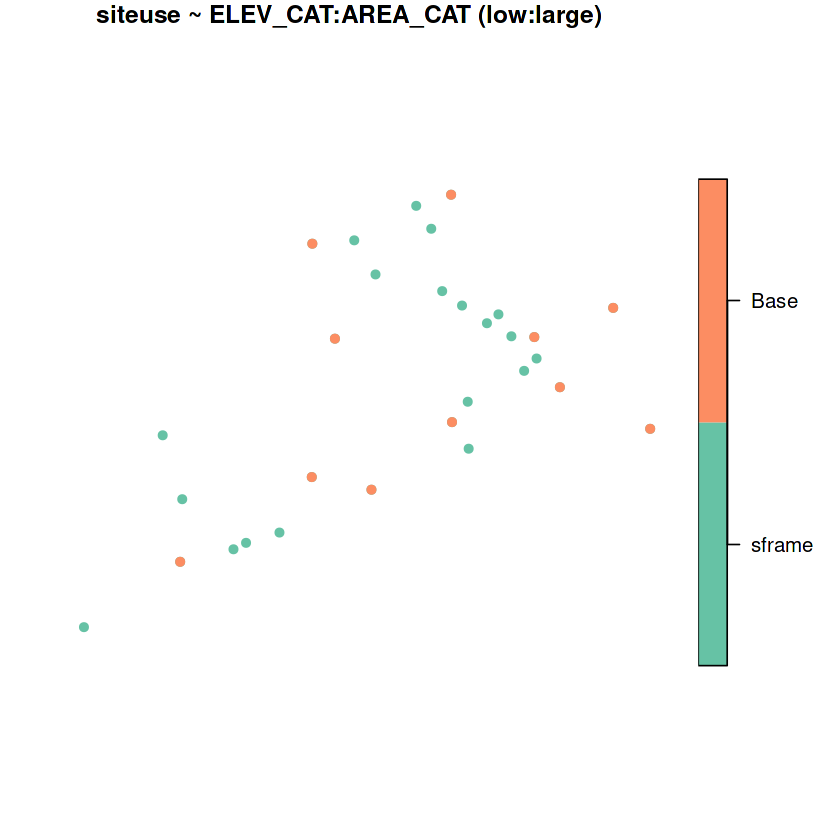

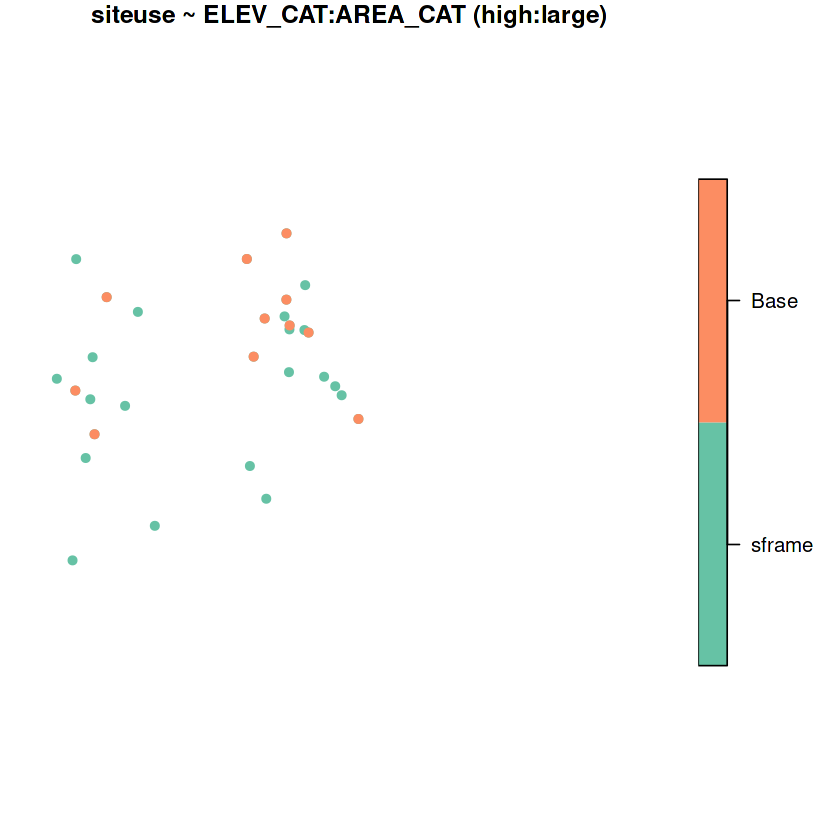

In [174]:
#Multiple plots to illustrate the site use and this corresponds to the summary above
plot(strat_uneqprob,formula = siteuse ~ ELEV_CAT * AREA_CAT, NE_Lakes,key.width = lcm(3),pch=16)

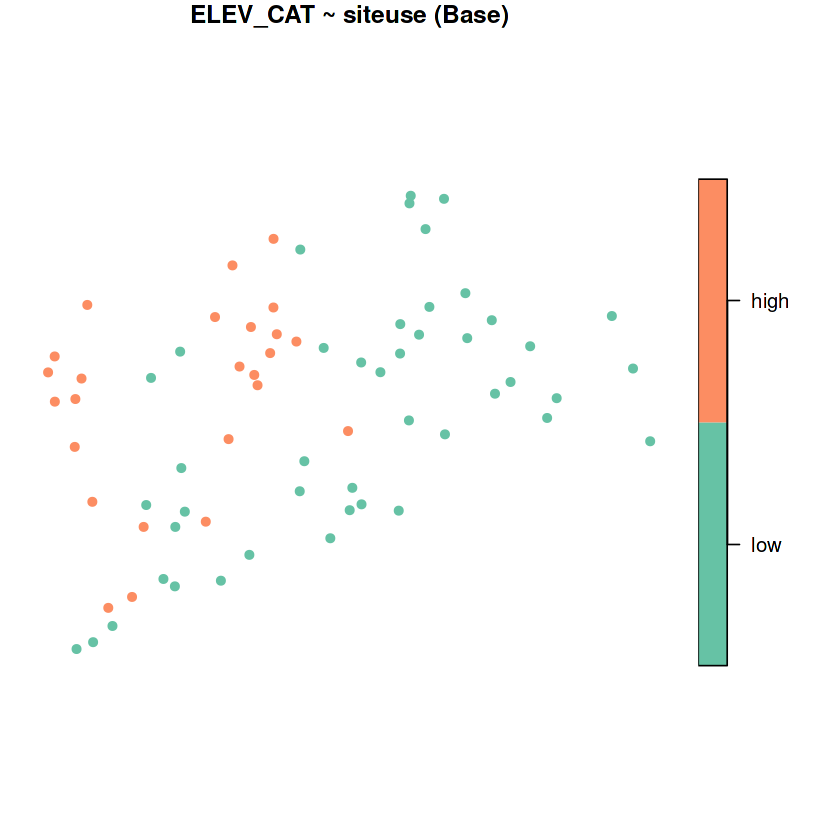

In [178]:
plot(strat_uneqprob,formula = ELEV_CAT ~ siteuse,pch=16,key.width = lcm(3))
# this plots shows the sample units in each category (no unsampled units present)

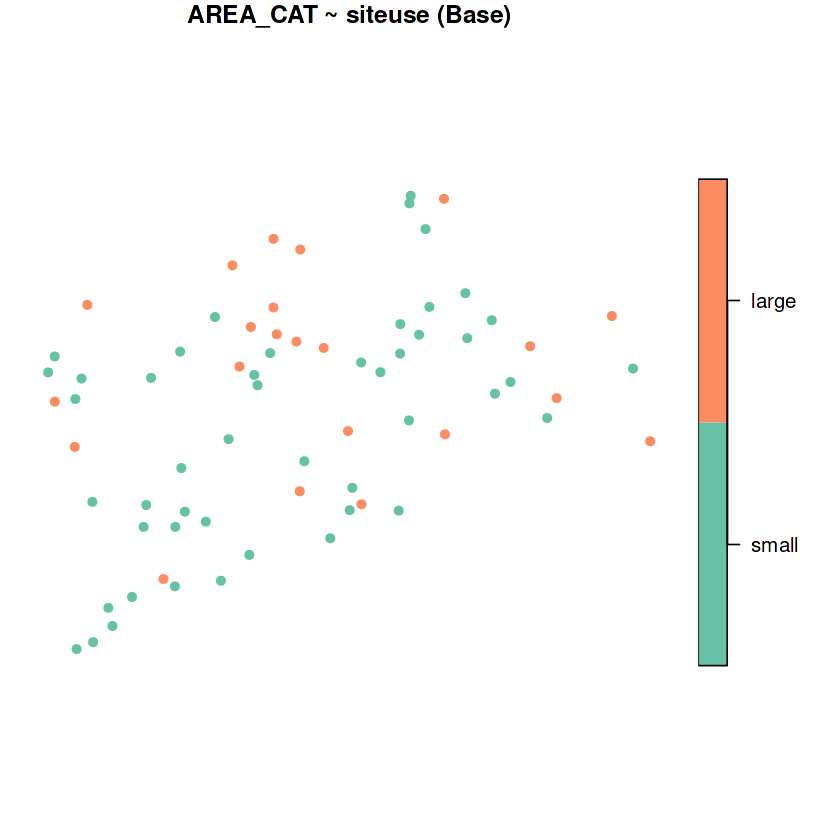

In [190]:
plot(strat_uneqprob,formula = AREA_CAT~ siteuse,pch=16,key.width = lcm(3))
# this plots shows the sample units in each category (no unsampled units present)

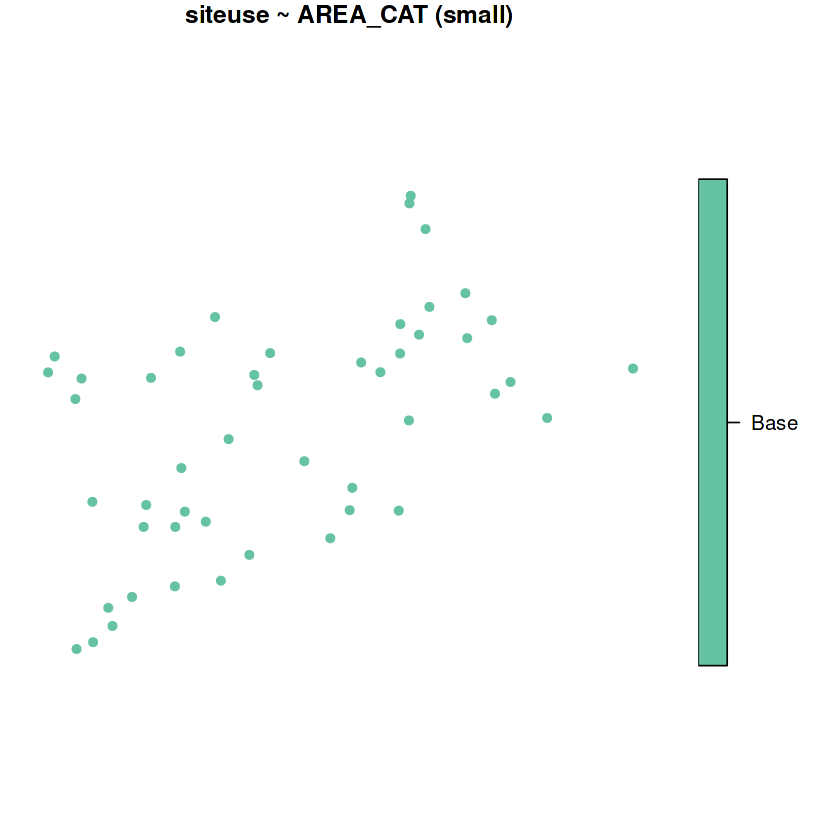

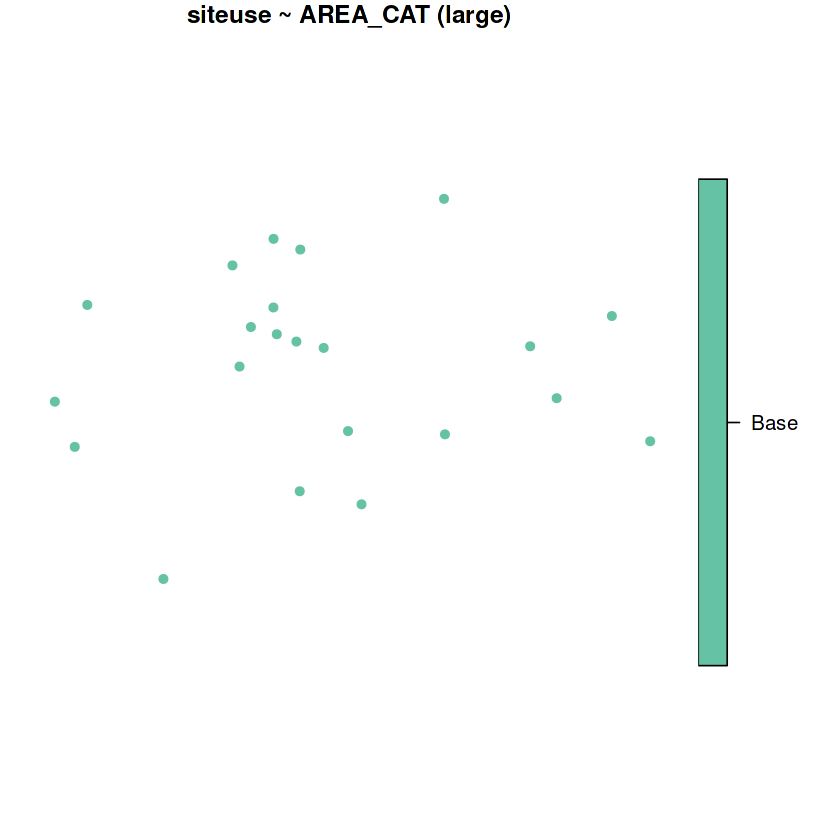

In [187]:
plot(strat_uneqprob,formula = siteuse~AREA_CAT,pch=16,key.width = lcm(3))


In [191]:
strat_propprob <- grts(
  NE_Lakes,
  n_base = strata_n,
  stratum_var = "ELEV_CAT",
  aux_var = "AREA"
)

In [192]:
strat_propprob

Summary of Site Counts: 

siteuse by total: 
      Base
total   70

siteuse by stratum: 
     Base
high   25
low    45


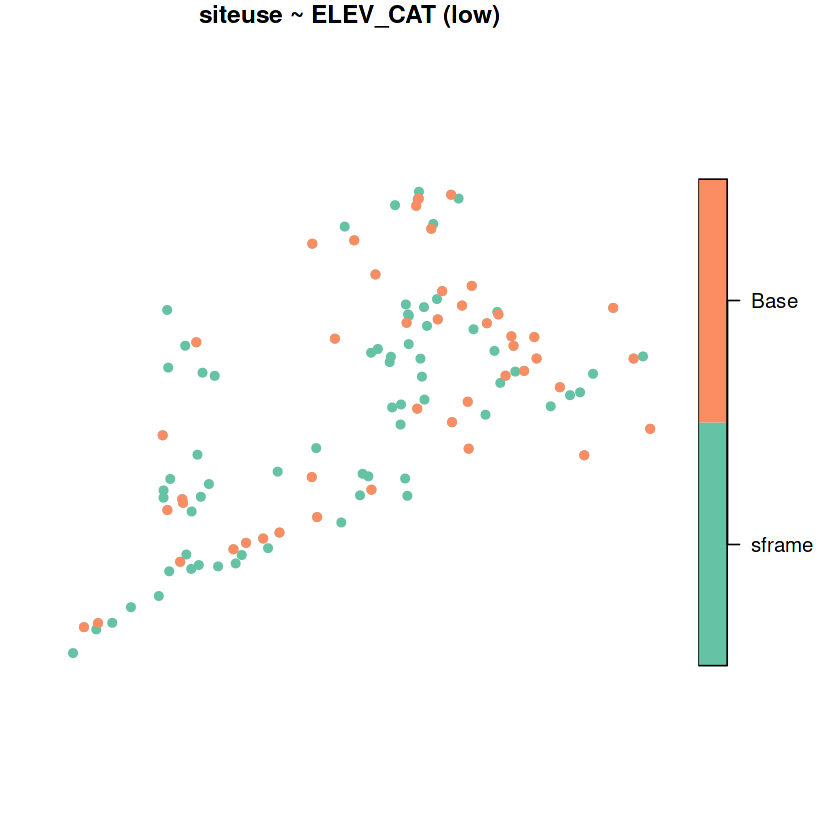

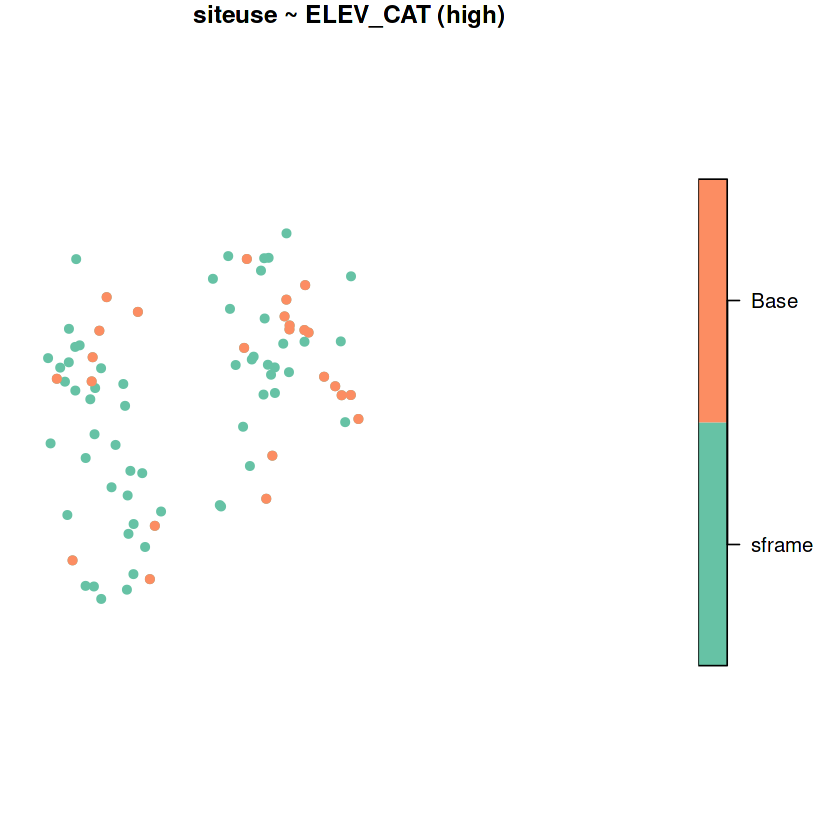

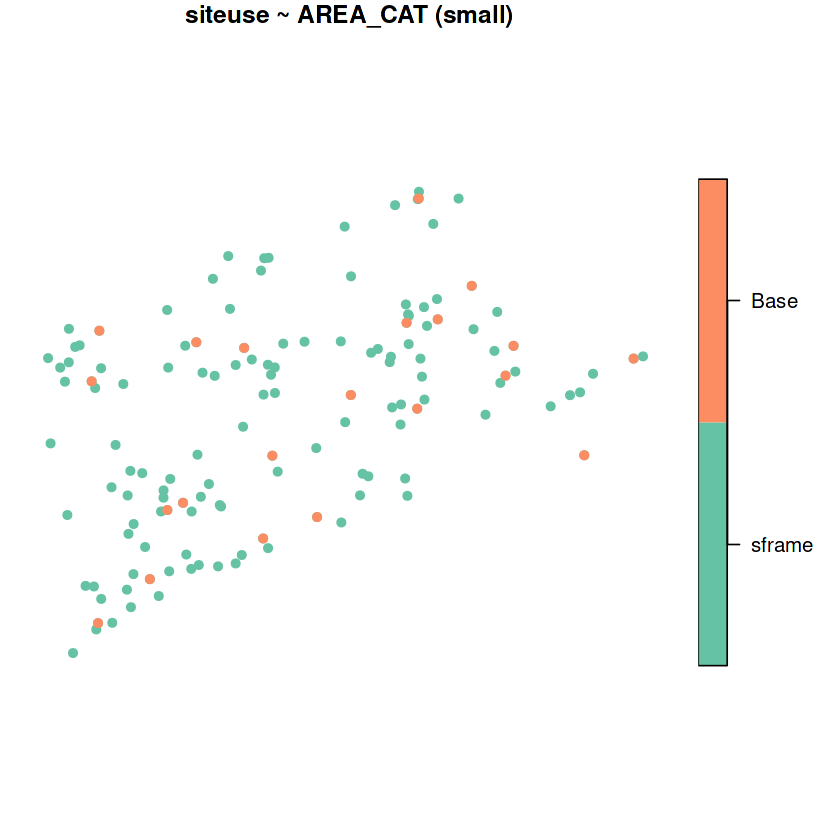

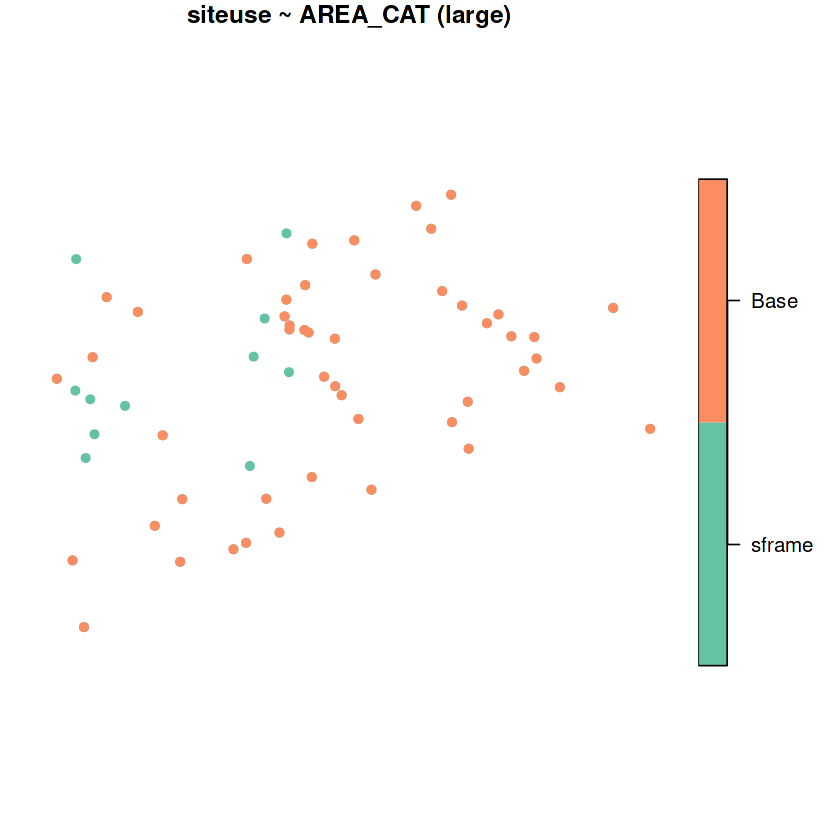

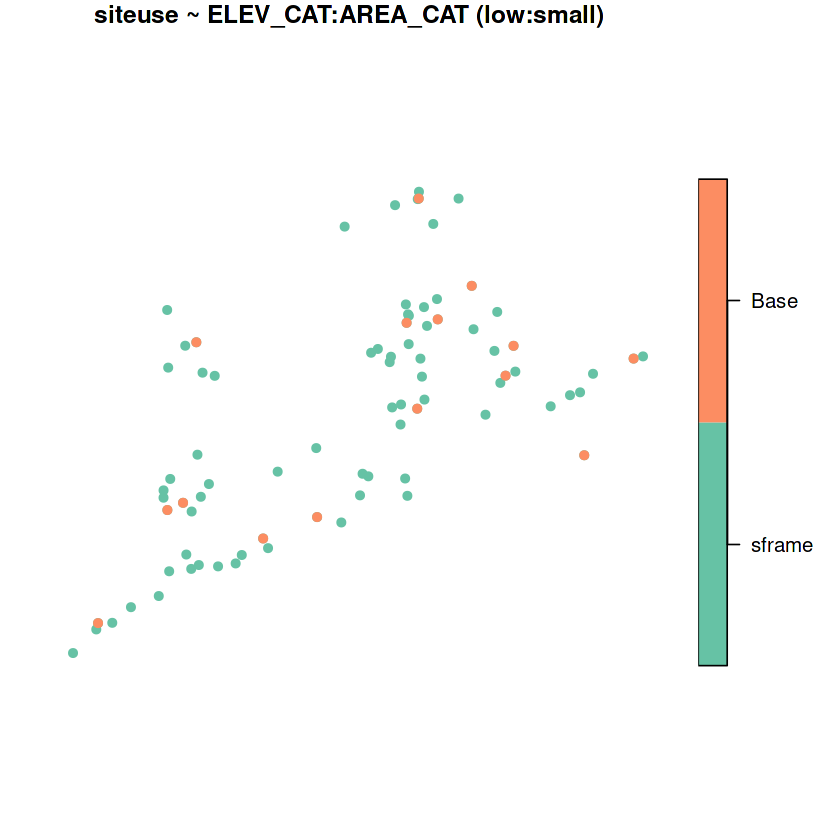

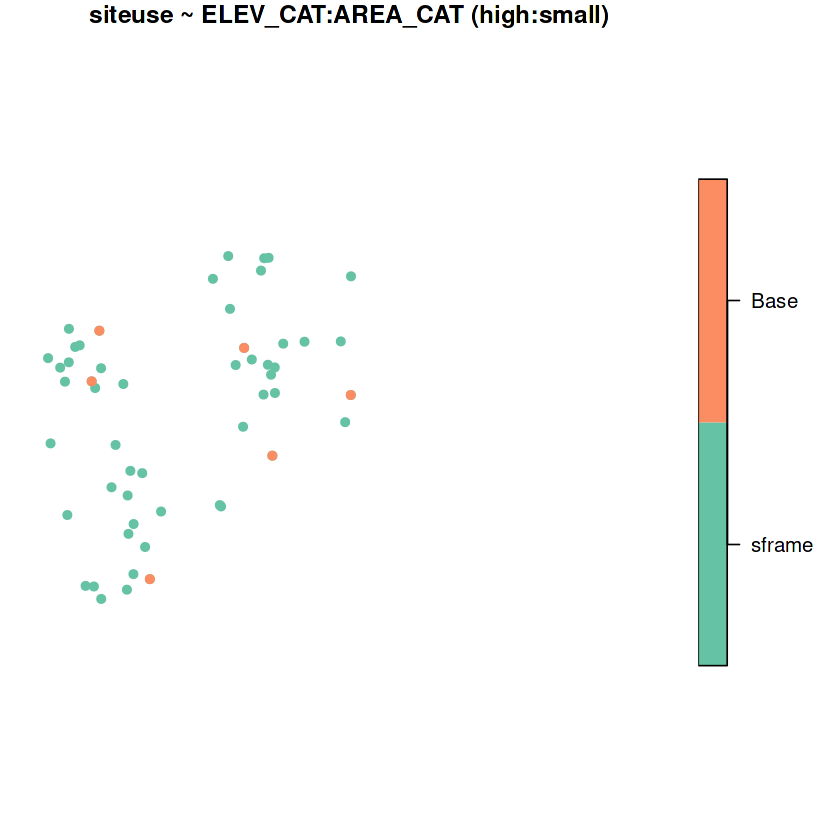

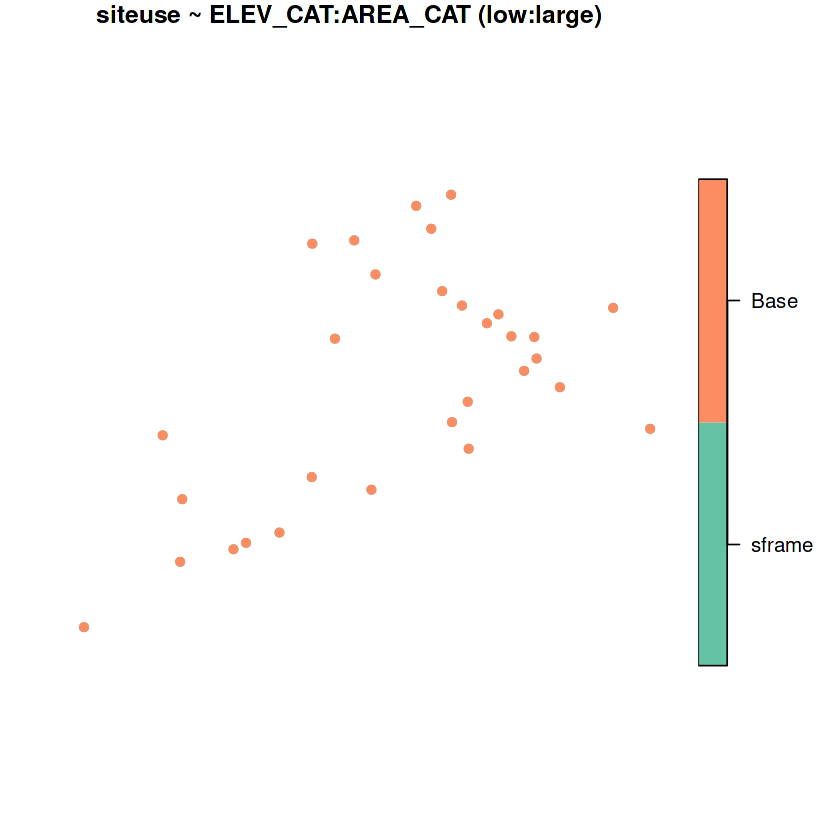

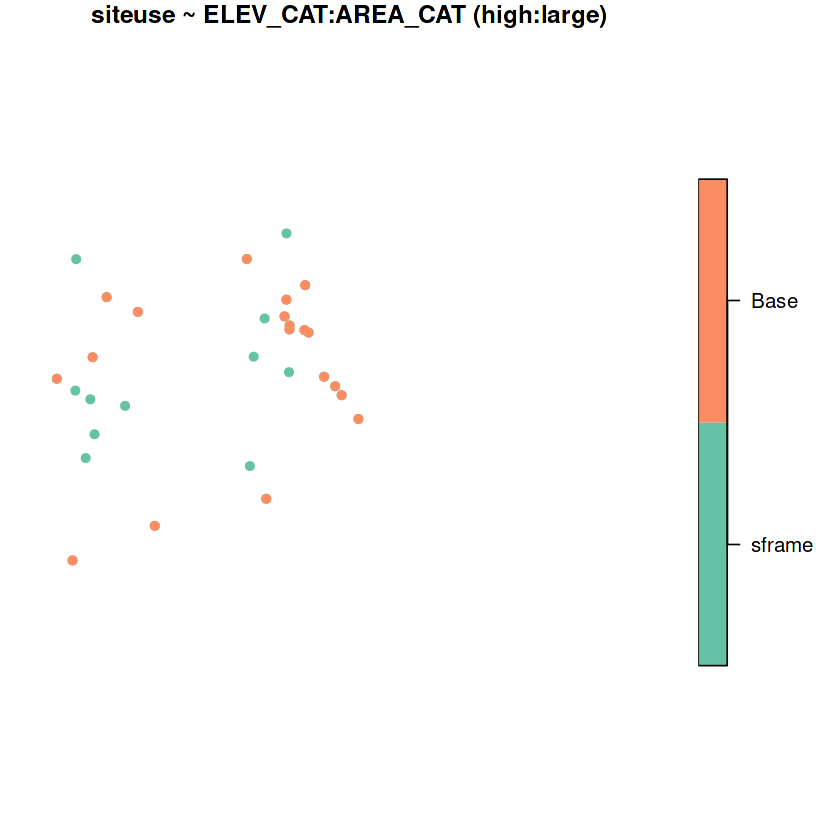

In [193]:
#Multiple plots to illustrate the site use and this corresponds to the summary above
plot(strat_propprob,formula = siteuse ~ ELEV_CAT * AREA_CAT, NE_Lakes,key.width = lcm(3),pch=16)

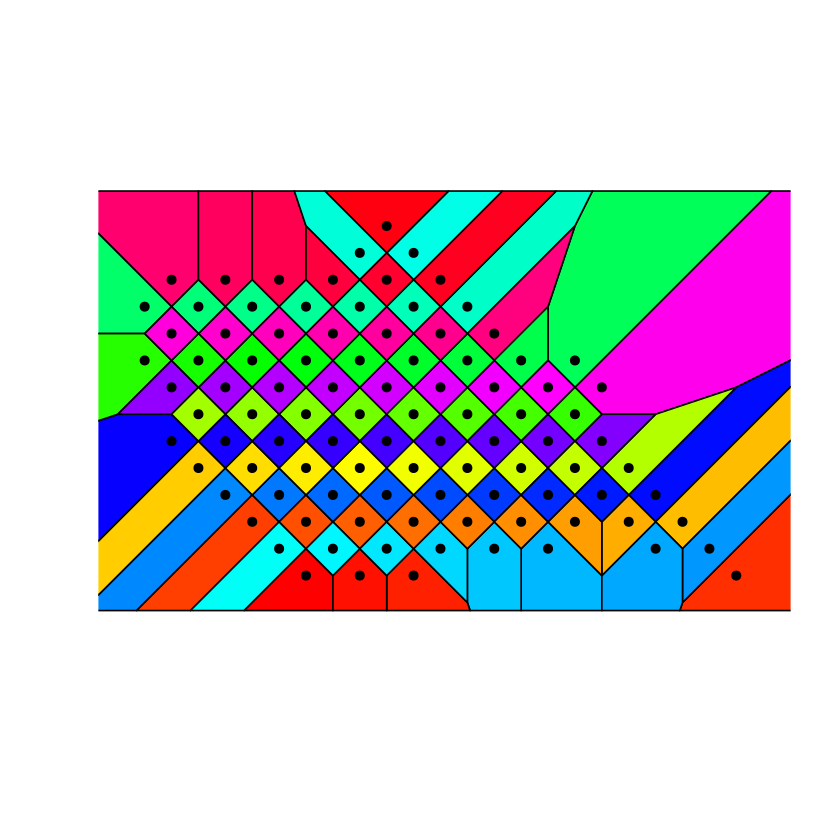

In [200]:
#calculate spatial balance for all the methods

#very important 
# Triangular grid inside a set of polygons
ellw.samp <- sss.polygon(ellw_s4,100,triangular=TRUE) 

# Voronoi polygons of triangular grid 
ellw.tess <- voronoi.polygons(ellw.samp)

# Plot 
plot(ellw_s4)
plot(ellw.tess, add=TRUE, col=rainbow(length(ellw.samp)))
plot(ellw.samp, add=TRUE, pch=16)


In [266]:
# One way to measure spatial balance: 
# Compare variance of Voronoi polygons to same sized  SRS, etc. sampling methods.  

ellw.bas <- bas.polygon(ellw_s4, 100)
ellw.srs <- srs.polygon(ellw_s4, 100)
ellw.sss <- sss.polygon(ellw_s4, 100)
ellw.hip <- hip.polygon(ellw_s4, 100)
ellw.grts <- grts(ellw, n_base = 100)
ellw.irs <- irs(ellw, n_base = 100)



ellw.bas.tess <- voronoi.polygons(ellw.bas)
ellw.srs.tess <- voronoi.polygons(ellw.srs)
ellw.sss.tess <- voronoi.polygons(ellw.sss)
ellw.hip.tess <- voronoi.polygons(ellw.hip)
#ellw.grts.tess<- voronoi.polygons(ellw.grts)

#rel.balance <- var(ellw.bas.tess$area)/var(ellw.srs.tess$area)
#maybe do here grts and compare it to all of them!!!



In [267]:
print(sp_balance(ellw.grts$sites_base, ellw))
print(sp_balance(ellw.irs$sites_base, ellw))

  stratum metric      value
1    None pielou 0.01086061
  stratum metric      value
1    None pielou 0.02804353


In [211]:
print(var(ellw.bas.tess$area)/var(ellw.srs.tess$area))
print(var(ellw.bas.tess$area)/var(ellw.hip.tess$area))
print(var(ellw.bas.tess$area)/var(ellw.sss.tess$area))
print(var(ellw.hip.tess$area)/var(ellw.sss.tess$area))
print(var(ellw.hip.tess$area)/var(ellw.srs.tess$area))


[1] 0.7764449
[1] 0.8898234
[1] 0.7500833
[1] 0.8429575
[1] 0.8725832


In [207]:
print(var(ellw.bas.tess$area))
print(var(ellw.hip.tess$area))
print(var(ellw.sss.tess$area))
print(var(ellw.srs.tess$area))

[1] 921269433111
[1] 1.03534e+12
[1] 1.228223e+12
[1] 1.186523e+12


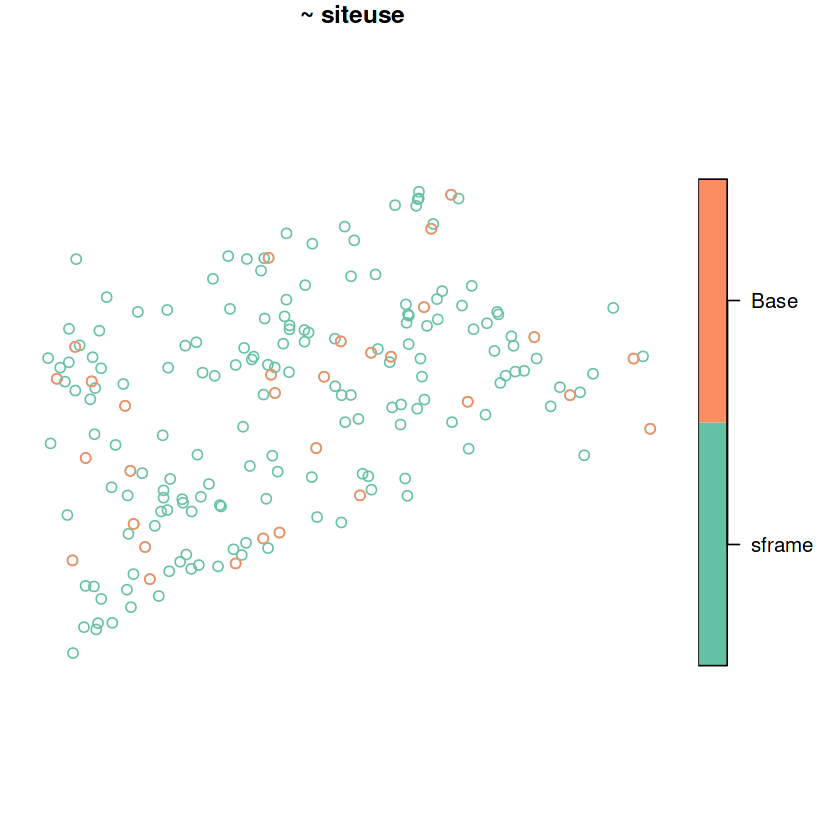

In [69]:
#GRTS with equal probability sampling, n=30
eqprob <- grts(NE_Lakes, n_base = 30)
plot(eqprob, NE_Lakes, key.width = lcm(3))
plot(eqprob, NE_Lakes, key.width = lcm(3), key.pos = 4)

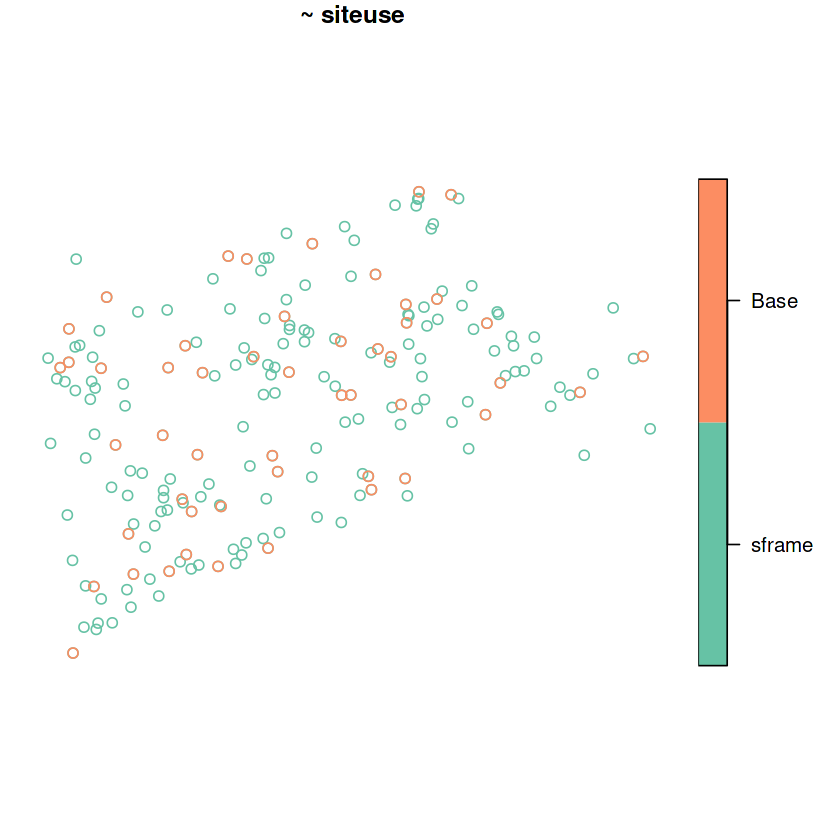

In [70]:
#GRTS with equal probability sampling, n=50

eqprob <- grts(NE_Lakes, n_base = 50)
plot(eqprob, NE_Lakes, key.width = lcm(3))
plot(eqprob, NE_Lakes, key.width = lcm(3), key.pos = 4)

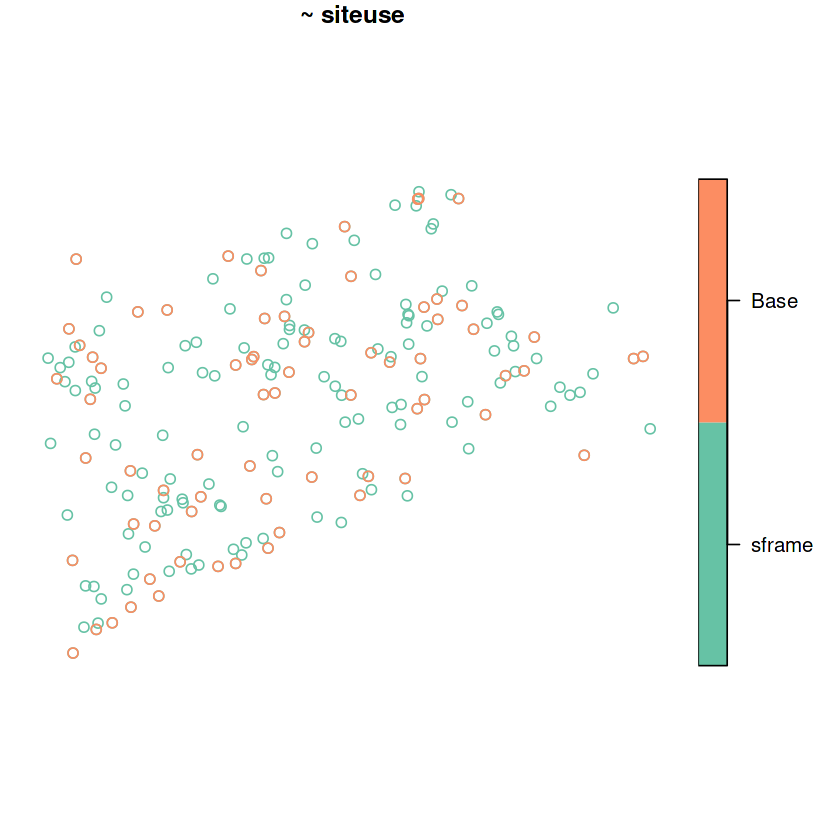

In [71]:
##GRTS with equal probability sampling, n=70

eqprob <- grts(NE_Lakes, n_base = 70)
plot(eqprob, NE_Lakes, key.width = lcm(3))
plot(eqprob, NE_Lakes, key.width = lcm(3), key.pos = 4)

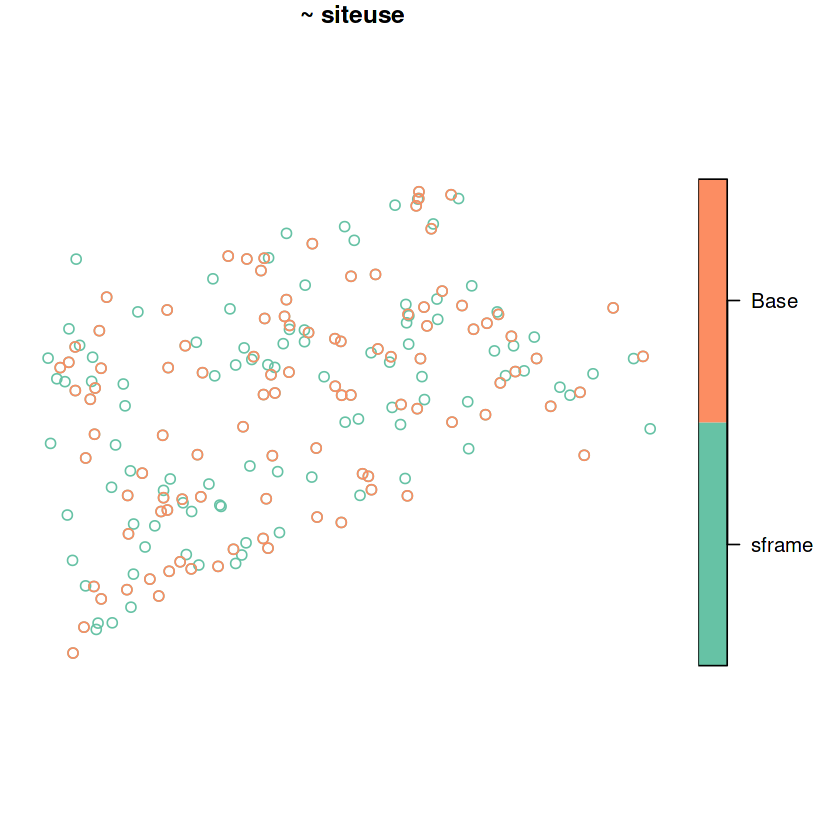

In [72]:
#GRTS with equal probability sampling, n=100

eqprob <- grts(NE_Lakes, n_base = 100)
plot(eqprob, NE_Lakes, key.width = lcm(3))
plot(eqprob, NE_Lakes, key.width = lcm(3), key.pos = 4)